# An Introduction to Computational RNA Science

Computational biology is a rapidly developing field, with new discoveries being made every day. Bringing the considerable power of computational research to bear against the hard problems in biology has yielded invaluable progress, from AlphaFold's accurate protein structure prediction to advancements in genetic medicine and cancer diagnosis.

Jupyter Notebooks are a form of interactive coding environment that allow rapid exploration of new ideas and documentation of analyses. In a notebook, you can mix code with text and images explaining the code. Notebooks are share-able, enabling others to duplicate your analysis or modify it for their purposes. Various online platforms ([Google Colab](https://colab.research.google.com), [Kaggle](https://www.kaggle.com), [Observable](https://observablehq.com/)) support notebooks and provide computational resources to run your code. Here we're using Colab because Colab supports GPU resources, which can be helpful when doing machine learning-based research.

## Hello World

Notebooks are primarily written in Python, the most common programming language for data analysis and machine learning. Notebooks consist of cells, which are editable spaces for either code or rich text. Code cells can be "executed", which runs the code in them using a Python interpreter. The output of that code will be visualized below the cell. The standard introduction to code is to print the phrase "Hello World". Click on the cell below and hit `Shift+Enter` to run it.

In [1]:
phrase = "Hello World"
print(phrase)

Hello World


Notice that the output is printed below the cell. Let's try changing the output. Select the cell and change the contents of the `phrase` variable to something else, like your name. Re-run the cell with `Shift+Enter`, and the output will update. This feature is part of what makes notebooks so useful for data exploration. You can experiment with various ideas and approaches and get feedback immediately.

Next let's try adding our own cell. Click the `+Code` button below this cell, then select the code cell that is created. Use that cell to determine what 468 divided by 18 is.

## Libraries

Python has many libraries (or packages) available for a variety of purposes which can be installed with Python's package manager `pip`. `pip` allows us to easily download and use packages distributed by other programmers. Let's try installing some useful libraries. First we will install `pandas`, the standard library for data analysis and manipulation. The `%` sign indicates a _magic function_, a special non-Python command that the notebook can interpret. Here we are telling the execution environment to use the `pip` tool to download and install the `pandas` library.

In [2]:
%pip install pandas

We'll use `pandas` a little later in the notebook. Let's also install a few more RNA utility libraries. We'll install a utility library called BioPython that provides lots of functions for a wide range of computational molecular biology tasks. `rdat_kit` is a Python library written by the Das Lab that allows us to easily interact with `.rdat` files, a format detailing the experimental results of RNA chemical mapping experiments. We'll also install `arnie`, a Python library created by the Das Lab to make various RNA modeling related tasks easier. Lastly, we'll install `matplotlib`, a commonly-used Python charting library.

In [3]:
%pip install biopython
%pip install rdat_kit
%pip install arnie
%pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 2.2 MB/s eta 0:00:00


## Working with data

Now that we have our libraries installed, let's get some data. We're going to use the [RNA Mapping Database (RMDB)](https://rmdb.stanford.edu/) to get a set of RNA chemical mapping experiment data. We can use the command line tool `curl` to download from a URL (`!` is used to tell the execution environment to use a new process in the execution environment to run this command).

In [4]:
!curl "https://rmdb.stanford.edu/site_data/file/VIR15K_2A3_0002/VIR15K_2A3_0002.rdat" > VIR15K.rdat

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 33.6M  100 33.6M    0     0  10.5M      0  0:00:03  0:00:03 --:--:-- 10.5M


With the data in hand, we'll read the file using `rdatkit`. To use Python libraries, we have to import them into our code. After importing, we can use the functions and classes defined in the library in our own code. We'll create a new `RDATFile` object, and then parse the file by loading it into the rdat object. The rdat object provides several methods to make it easier to interact with the data. `.values` returns the experimental data: a measured reactivity value for every nucleotide in every RNA sequence in the sample.

In [4]:
import rdat_kit

# Create an rdat file object
rdat = rdat_kit.RDATFile()

# Use the file object to load the data we downloaded earlier
rdat.load(open('./VIR15K.rdat'))

# Let's check some of the details of the experiment, like what chemical modification was used
print(rdat.annotations)

# We can also print the actual chemical mapping data
display(rdat.values["15k"])

{'modifier': ['2A3'], 'chemical': ['Bicine:150mM(pH8.5)', 'MgCl2:10mM'], 'temperature': ['24C'], 'processing': ['RNAFramework-v2.8.2'], 'experimentType': ['StandardState']}


[[0.0551,
  0.5977,
  0.8009,
  0.2192,
  0.1694,
  -0.017,
  0.0847,
  0.0426,
  0.4037,
  0.0547,
  -0.1935,
  -0.0633,
  0.0082,
  -0.0001,
  -0.0004,
  -0.01,
  -0.068,
  -0.0547,
  -0.2592,
  0.179,
  0.3644,
  0.1455,
  0.5388,
  0.0288,
  -0.0621,
  0.0881,
  0.1866,
  0.0963,
  0.2749,
  0.278,
  0.1386,
  0.6677,
  1.317,
  2.0016,
  0.6028,
  1.3634,
  0.3536,
  -0.1011,
  -0.0396,
  0.0419,
  0.4314,
  0.2122,
  0.3252,
  0.7868,
  -0.0628,
  0.0938,
  -0.0914,
  -0.1507,
  -0.0411,
  0.0209,
  -0.01,
  -0.0568,
  0.2052,
  -0.0032,
  0.034,
  0.0796,
  -0.0897,
  0.2792,
  -0.0822,
  -0.0503,
  -0.0133,
  -0.0912,
  -0.1448,
  -0.0325,
  -0.1879,
  -0.1057,
  -0.0419,
  -0.1418,
  0.2294,
  -0.0059,
  0.0132,
  0.2697,
  0.4335,
  0.1216,
  0.1148,
  0.0423,
  -0.0091,
  -0.0485,
  -0.141,
  -0.0822,
  0.2167,
  -0.0855,
  -0.0587,
  0.049,
  -0.1178,
  0.1271,
  -0.0207,
  0.1266,
  0.1164,
  0.0,
  0.1483,
  0.2445,
  -0.1073,
  -0.0059,
  0.5056,
  0.3834,
  0.4507,
  1.

It's pretty difficult to work with the data in the format returned by `rdat.values`. Let's use the `pandas` library to transform the data into a more usable form. `pandas` works with DataFrames, a representation of data that you can think of a bit like an Excel table. The [pandas documentation](https://pandas.pydata.org/docs/) is very detailed, and they even have a [10 minute guide to pandas](https://pandas.pydata.org/docs/user_guide/10min.html) that can be a very helpful overview of what the library can do.

In [6]:
import pandas
data = pandas.DataFrame(rdat.values["15k"])
display(data)

0       1       2       3       4       5       6       7       8    \
0      0.0551  0.5977  0.8009  0.2192  0.1694 -0.0170  0.0847  0.0426  0.4037   
1      0.0250  0.3754  0.0083  0.1372  0.2134  0.0258  0.0617  0.0772  0.0739   
2     -0.0367  0.8934  0.2953  0.4255  0.2574 -0.0209  0.0912 -0.0376  0.1407   
3     -0.0437  0.5062 -0.0570 -0.5203  0.0527 -0.0046  0.0242  0.0151  0.0873   
4     -0.0534  0.7960  0.2119 -0.7834  0.1440 -0.0490  0.0297  0.1186  0.0423   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
12628  1.2528  1.2765  0.6794  0.9128  0.3130  0.1290 -0.0148 -0.0296 -0.0145   
12629  1.1445  1.2742  0.5327  0.7870  0.1394  0.0183  0.0094  0.0434 -0.0394   
12630  1.2976  1.2226  0.4905  0.7987  0.2635  0.0850 -0.0022  0.0444 -0.0321   
12631  0.9600  1.2912  0.5269  0.8731  0.1052 -0.0263 -0.0995 -0.0019  0.1444   
12632  1.1950  0.9843  0.7103  0.7603  0.3236  0.0582  0.0812 -0.0663  0.0029   

          9    ...     114     115     116     117     118     119     120  \
0      0.0547  ...  0.9823  0.7965  0.3895 -0.3533 -0.3060  0.5074  0.6998   
1      0.2940  ...  0.9394 -0.0277 -0.0530 -0.0878 -0.0187 -0.0133 -0.0577   
2     -0.1238  ...  1.2552  0.1624 -0.2414  0.3541 -0.1368 -0.3010 -0.1010   
3      0.2914  ...  1.1551  0.2839 -0.3053 -0.4398  0.1383  0.1245  0.1058   
4      0.1916  ...  0.9221  0.0668  0.1006  0.1311 -0.4762  0.0826 -0.2064   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
12628 -0.0027  ...  0.2823  0.9121 -0.1549  0.0513  0.0118 -0.0194  0.0190   
12629  0.0070  ...  0.1637  1.3126  0.1364  0.0565  0.0930  0.0547  0.0346   
12630  0.0334  ...  0.7655  1.3461  0.0451 -0.0152 -0.0196 -0.0108 -0.0970   
12631 -0.0053  ...  0.6472  0.2537  0.2545  0.0388 -0.0542 -0.1120  0.3224   
12632 -0.0024  ...  0.7719  0.2581  0.4427  0.2093  0.0511  0.1048 -0.0684   

          121     122     123  
0      0.1121  0.6049  0.5394  
1      0.0181  0.1246  0.5661  
2     -0.0439  0.1006  0.2337  
3      0.7211  0.0851  0.3560  
4      0.0505  0.3601 -0.0774  
...       ...     ...     ...  
12628  0.1974  0.4552  1.0196  
12629  0.0832  0.2550  0.6075  
12630  0.0164  0.1717  0.1079  
12631  0.2036  0.3501  1.1376  
12632  0.1794  0.0457  0.2723  

[12633 rows x 124 columns]

In this form, it's easier to see that each row in the table represents an RNA sequence in the sample, and the value in each column represents the chemical reactivity measured at that nucleotide position in the sequence. This dataset consists of 12633 sequences with lengths of 124 nucleotides.

We have the data, but that RDAT file doesn't include labels for each sequence. We've included a fasta file describing the sequence sources in the Github repo. We'll use BioPython to read and parse the fasta file into a list of SeqRecord objects.

In [5]:
!curl "https://raw.githubusercontent.com/DasLab/Stanford_BIOC202_DataScience/main/230601_GPN_library_RCK_edit.fasta" > sequence_labels.fasta
from Bio import SeqIO

sequence_records = list(SeqIO.parse("sequence_labels.fasta", "fasta"))
display(sequence_records)

curl: /usr/local/lib/libcurl.so.4: no version information available (required by curl)
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3093k  100 3093k    0     0  5068k      0 --:--:-- --:--:-- --:--:-- 5063k


[SeqRecord(seq=Seq('GGGAACGACTCGAGTAGAGTCGAAAAACGTTGATATGGATTTACTCCGAGGAGA...AAC'), id='miniTTR6:6DVK_2pad3_libraryready', name='miniTTR6:6DVK_2pad3_libraryready', description='miniTTR6:6DVK_2pad3_libraryready', dbxrefs=[]),
 SeqRecord(seq=Seq('GGGAACGACTCGAGTAGAGTCGAAAAACATTGATATGGATTTACTCCGAGGAGA...AAC'), id='miniTTR6:6DVK_0G-A_2pad3_libraryready', name='miniTTR6:6DVK_0G-A_2pad3_libraryready', description='miniTTR6:6DVK_0G-A_2pad3_libraryready', dbxrefs=[]),
 SeqRecord(seq=Seq('GGGAACGACTCGAGTAGAGTCGAAAAACCTTGATATGGATTTACTCCGAGGAGA...AAC'), id='miniTTR6:6DVK_0G-C_2pad3_libraryready', name='miniTTR6:6DVK_0G-C_2pad3_libraryready', description='miniTTR6:6DVK_0G-C_2pad3_libraryready', dbxrefs=[]),
 SeqRecord(seq=Seq('GGGAACGACTCGAGTAGAGTCGAAAAACTTTGATATGGATTTACTCCGAGGAGA...AAC'), id='miniTTR6:6DVK_0G-T_2pad3_libraryready', name='miniTTR6:6DVK_0G-T_2pad3_libraryready', description='miniTTR6:6DVK_0G-T_2pad3_libraryready', dbxrefs=[]),
 SeqRecord(seq=Seq('GGGAACGACTCGAGTAGAGTCGAAAAACGATGATA

## Visualization

Now let's try plotting that data so we can see the numbers represented visually. We'll import the `matplotlib` library, then we'll plot the first 100 sequences in a heatmap. The [matplotlib documentation](https://matplotlib.org/stable/index.html) is very helpful at detailing the various options available for your charts. They also have a series of [cheatsheets](https://matplotlib.org/cheatsheets/).

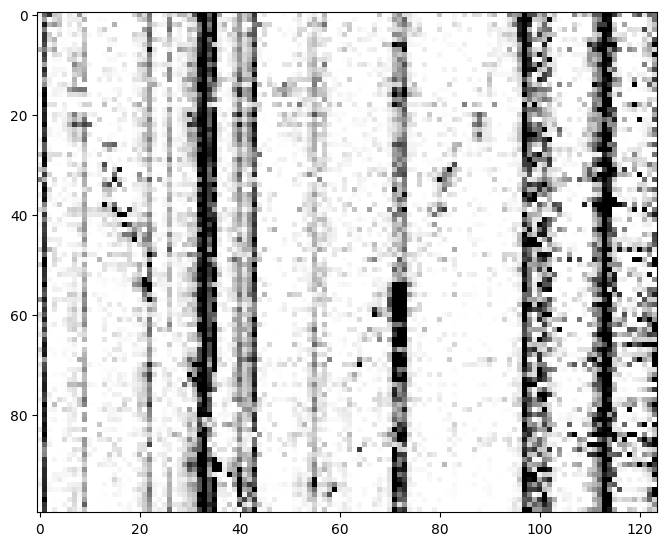

In [8]:
import matplotlib
import matplotlib.pyplot as plt

# Select the first 100 sequences
data100 = data[:100]

# Set up the plot, define the normalization scale and our color map
fig, ax = plt.subplots(figsize=(8, 64))
norm=plt.Normalize(0,1)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","black"])

# Apply the data
im = ax.imshow(data100, cmap=cmap, norm=norm)

# Display the plot
plt.show()

## Hypothesizing

Now that we have a better understanding of our data, let's try to use it to answer a scientific question. Lately our lab has been studying RNA pseudoknots. These are the simplest form of tertiary structure, where RNA bases in a loop (CCGCG in this diagram) bind with bases further in the RNA strand (CGCGG here). Figure b shows an intutive way to visualize this structure using a chart called an arc plot. Notice how the arcs cross each other, indicating a pseudoknot.

![image.png](https://openi.nlm.nih.gov/imgs/512/165/3549817/PMC3549817_1471-2105-14-S2-S1-1.png?keywords=virus,mammary%20tumor,ncrna)

Let's explore this data to see if we can find interesting candidate sequences that might contain a pseudoknot. We're looking for highly protected, structured sequences, as these are most likely to be involved in a pseudoknot. We can use three simple rules of thumb to evaluate a sequence:
- The sequence should be 90 nucleotides or longer
- The sequence should have no helices greater than 20 base pairs
- The sequence should have no unpaired regions greater than 5

Now let's try to encode these rules into a function that we can apply to our data. This function will be given a set of reactivity data about a sequence, and it will return true if the sequence passes these checks or false if the sequence fails. The next code block has the skeleton of this function set up. It's your job to fill it in.

In [9]:
def pseudoknot_check(data):
    # Set cutoff variables for what qualifies a base as unpaired or paired
    paired_value = 0.5
    unpaired_value = 0.5

    # Check that the sequence is long enough
    # E.g, sequence has a length longer than 90 nucleotides
    # Your code goes here

    # Check that the sequence has no helices greater than 20 base pairs
    # E.g, no more than 20 bases in a row with reactivity less than the paired_value
    paired_counter = 0
    for base in data:
      # print(base, paired_counter)
      # If the base reactivity is less than the paired_value, it's paired
      if (base < paired_value):
          # Add to the paired_counter
          paired_counter += 1
      else:
          # Reset the counter
          paired_counter = 0

      # If the paired_counter gets to greater than 20, it fails our helix length test
      if (paired_counter > 20):
          # print("Fails helix test")
          return False

    # Check that the sequence has no unpaired regions greater than 5 base pairs
    # E.g, no string of 6 or more bases in a row with reactivity greater than the unpaired_value
    # Your code goes here

    # If none of the checks have failed, the sequence passes
    return True


**Spoiler Alert:**
Here is a cell containing a working pseudoknot_check function. Reveal it if you need help.

In [10]:
# @title
def pseudoknot_check(data):
    # Set cutoff variables for what qualifies a base as unpaired or paired
    paired_value = 0.7
    unpaired_value = 0.3

    # Check that the sequence is long enough
    # E.g, sequence has a length longer than 90 nucleotides
    if (len(data) < 90):
        return False

    # Check that the sequence has no helices greater than 20 base pairs
    # E.g, no more than 20 bases in a row with reactivity less than the paired_value
    paired_counter = 0
    for base in data:
      # print(base, paired_counter)
      # If the base reactivity is less than the paired_value, it's paired
      if (base < paired_value):
          # Add to the paired_counter
          paired_counter += 1
      else:
          # Reset the counter
          paired_counter = 0

      # If the paired_counter gets to greater than 20, it fails our helix length test
      if (paired_counter > 20):
          # print("Fails helix test")
          return False

    # Check that the sequence has no unpaired regions greater than 5 base pairs
    # E.g, no string of 6 or more bases in a row with reactivity greater than the unpaired_value
    unpaired_counter = 0
    for base in data:
      # If the base reactivity is greater than the paired_value, it's unpaired
      if (base > unpaired_value):
          # Add to the paired_counter
          unpaired_counter += 1
      else:
          # Reset the counter
          unpaired_counter = 0

      # If the paired_counter gets to greater than 5, it fails our unpaired region test
      if (unpaired_counter > 5):
          # print("Fails unpaired region test")
          return False

    # If none of the checks have failed, the sequence passes
    return True


Now that we have our function, we can apply it to our data. First, we'll add a new column to our data with the signal-to-noise ratio from the rdat annotations. Then we'll filter the data to only look at data with a high enough signal value. Finally, `pandas` provides a handy function, `apply`, that will run a function against our dataframe, passing in each row, and then recording the output of the function for each row. Then we can filter the results, showing only the sequences that pass our check.

In [11]:
# Add signal-to-noise ratio value from rdat annotations to filter low quality data
signals = list(map(lambda x: float(x.annotations['signal_to_noise'][0].split(":")[1]), rdat.constructs['15k'].data))
signal_annotations = pandas.DataFrame(signals, columns=['snr'])
updated = data.join(signal_annotations, how="left")

# Filter all sequences to only include signal-to-noise ratios greater than 5.
filtered = updated.loc[updated['snr'] > 5]

# Remove the snr column
filtered.drop('snr', axis=1)

checked_data = filtered.apply(pseudoknot_check, axis=1)
candidate_indexes = checked_data[checked_data == True].index
display(candidate_indexes)

Int64Index([  497,   559,   668,   909,   918,   938,   953,   965,  1064,
             1067,  1087,  1100,  1141,  1152,  2438,  4666,  6132,  6165,
             6527,  6764,  7243,  7379,  8073,  8329,  8666,  9796,  9928,
            10198, 10244, 10443, 10545, 10885, 10886, 10895, 11033, 11047,
            11084, 11142, 11881, 11892, 12161],
           dtype='int64')

Now we have a list of over 40 promising candidate sequences that might contain pseudoknots. Let's plot a few to visually validate that our function did its job.

Candidate: 497
Signal To Noise Ratio: good:6.494
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTCTCAAGAGAGGTGGAGGGACTGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCTGCAGCGGAAACGTTGAAAGATGAGCCGATGAAGCAGTTCTGTTCGCAGAACTGAAAAGAAACAACAACAACAAC


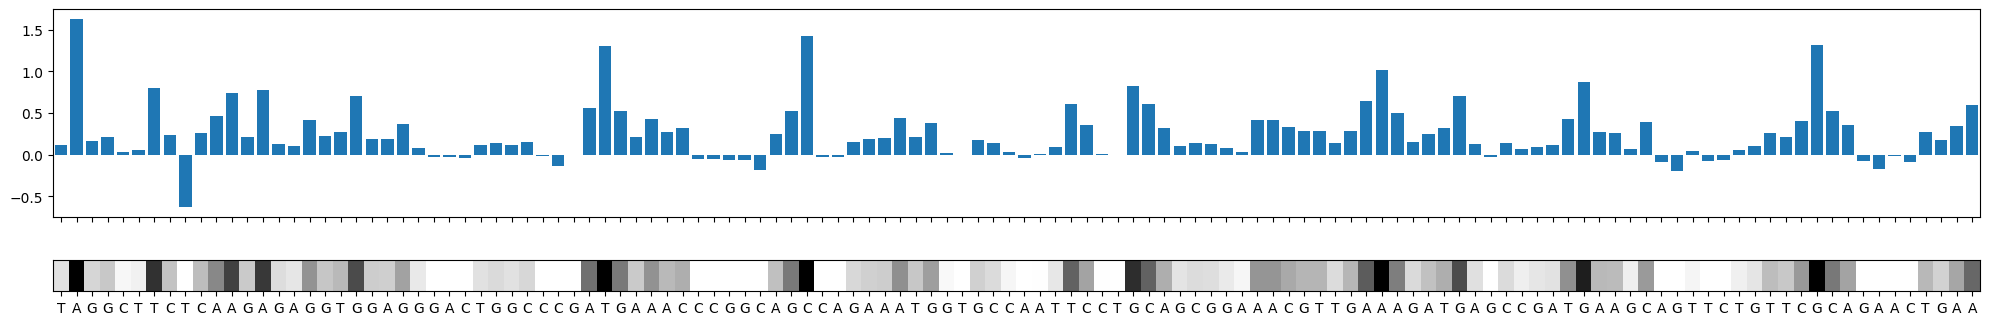

Candidate: 559
Signal To Noise Ratio: good:5.727
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTGCCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCTGCAGCGGAAACGTTGAAAGATGAGCCGATGACCGGAGATGGTTCGCCATCTCCAAAAGAAACAACAACAACAAC


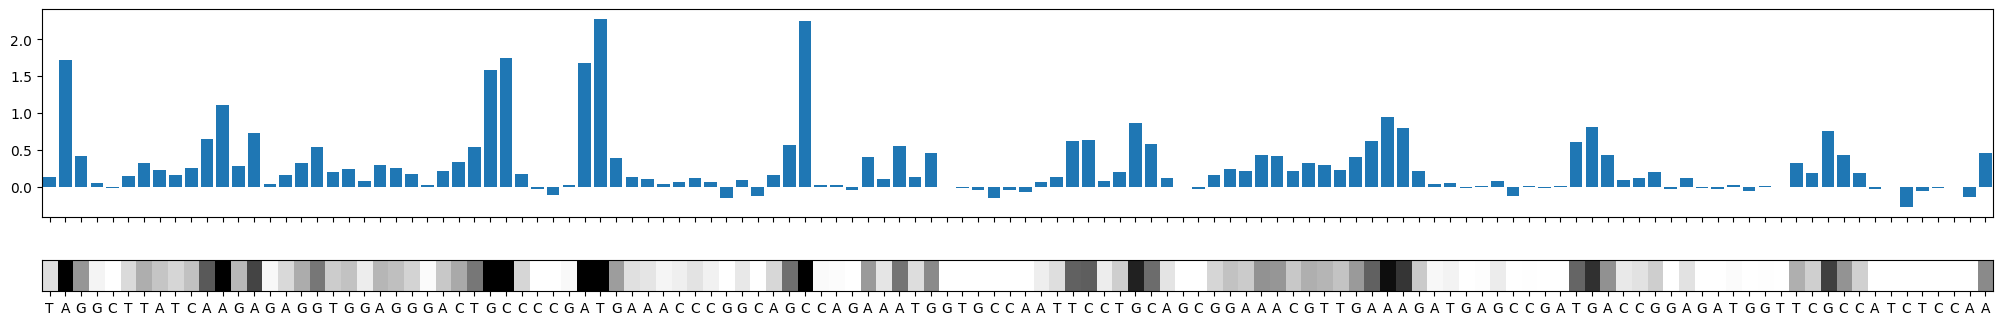

Candidate: 668
Signal To Noise Ratio: strong:10.405
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCTGCGGCGGAAACGTTGAAAGATGAGCCGATGAGACCATAGAGTTCGCTCTATGGAAAAGAAACAACAACAACAAC


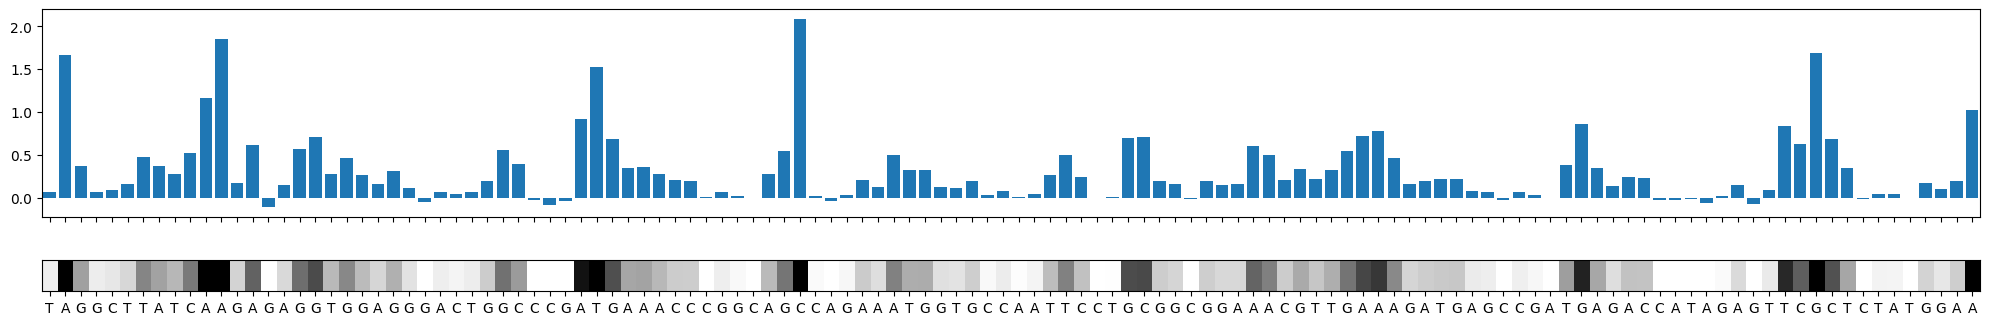

Candidate: 909
Signal To Noise Ratio: strong:11.259
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTAGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAACTCCTGCAGCGGAAACGTTGAAAGATGAGCCGATGTCACATCTAAGTTCGCTTAGATGAAAAGAAACAACAACAACAAC


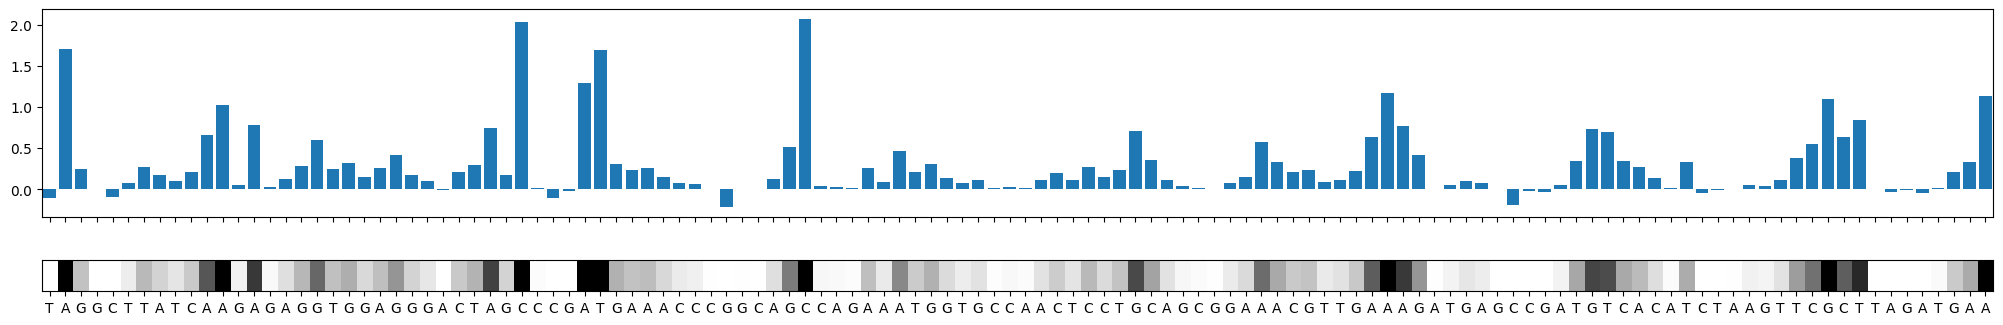

Candidate: 918
Signal To Noise Ratio: good:8.531
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTCGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCTATTCCTGCAGCGGAAACGTTGAAAGATGAGCCGATGTCAGACTTACGTTCGCGTAAGTCAAAAGAAACAACAACAACAAC


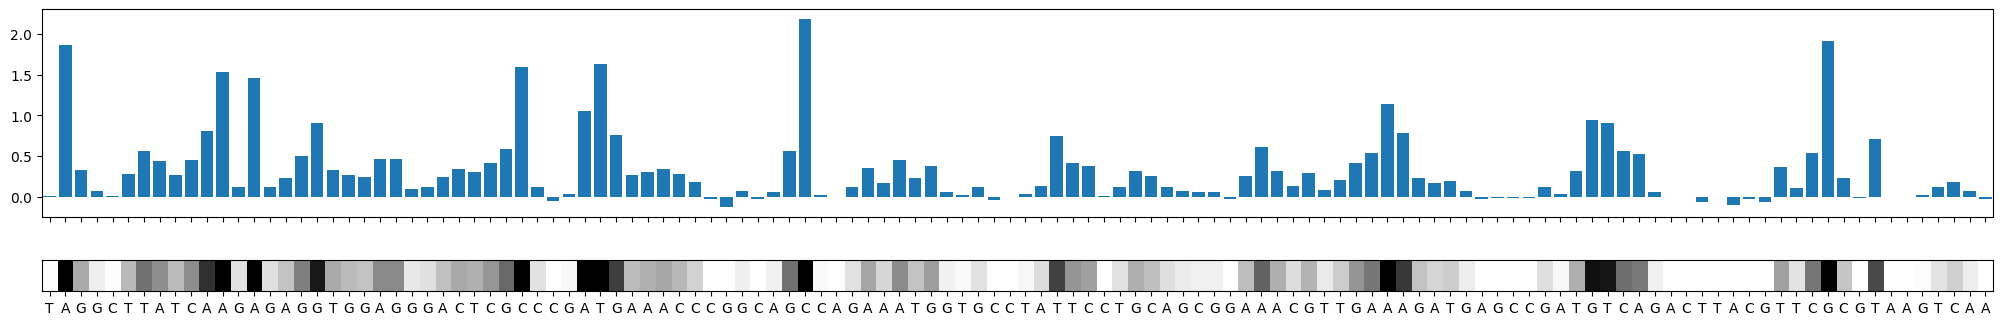

Candidate: 938
Signal To Noise Ratio: good:9.292
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTTGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTGCTGCAGCGGAAACGTTGAAAGATGAGCCGATGAGGCACTTCCGTTCGCGGAAGTGAAAAGAAACAACAACAACAAC


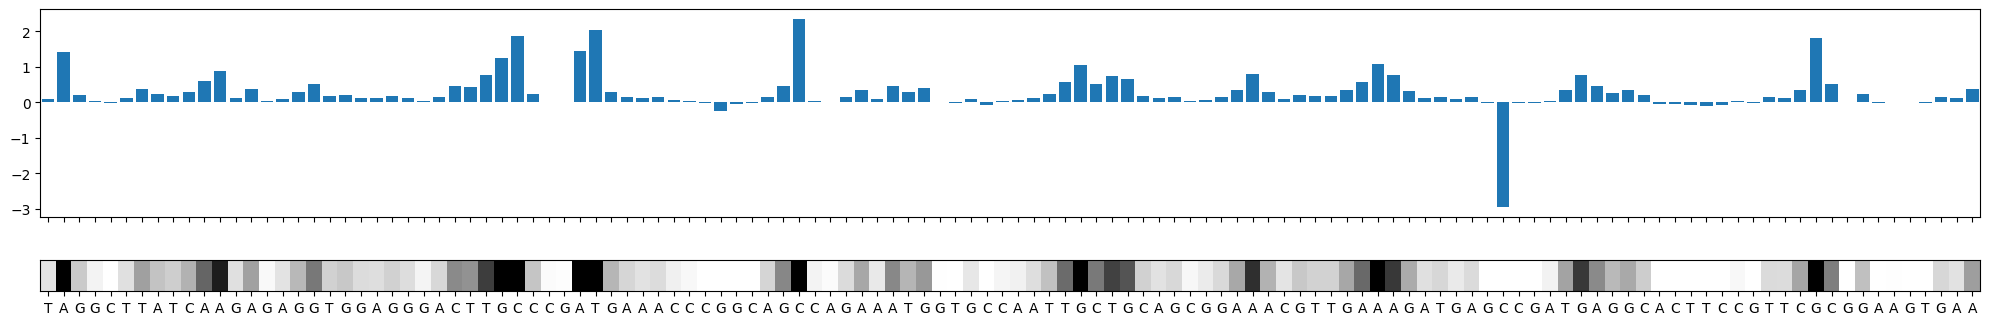

Candidate: 953
Signal To Noise Ratio: good:8.031
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTGACCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCATGCAGCGGAAACGTTGAAAGATGAGCCGATGCAGGCGTAAGGTTCGCCTTACGCAAAAGAAACAACAACAACAAC


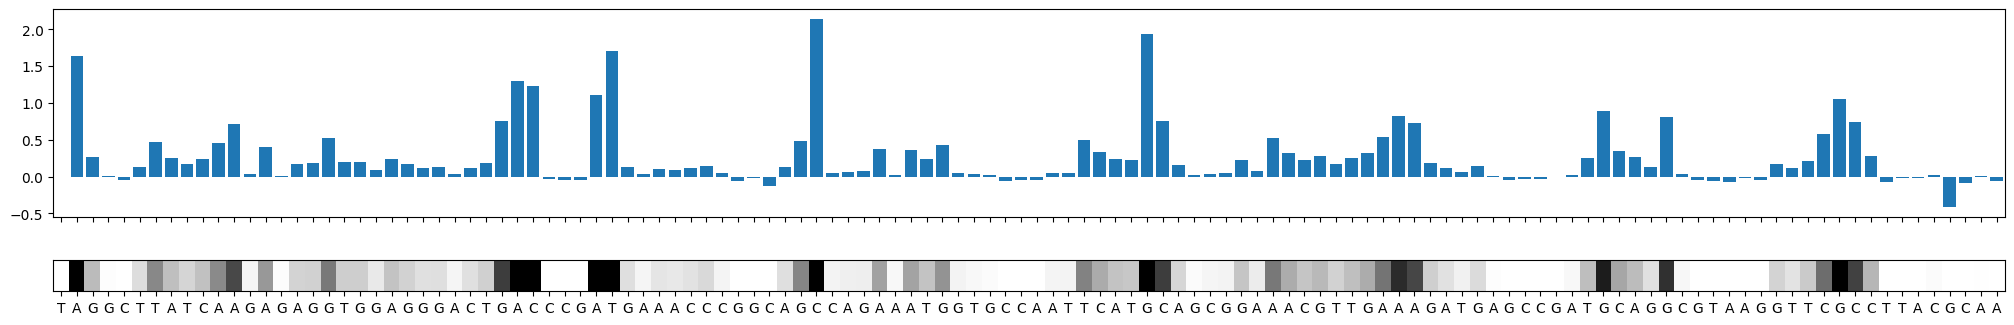

Candidate: 965
Signal To Noise Ratio: good:9.176
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACTGCCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCATGCAGCGGAAACGTTGAAAGATGAGCCGATGGTGCTTTAGACTTCGGTCTAAAGAAAAGAAACAACAACAACAAC


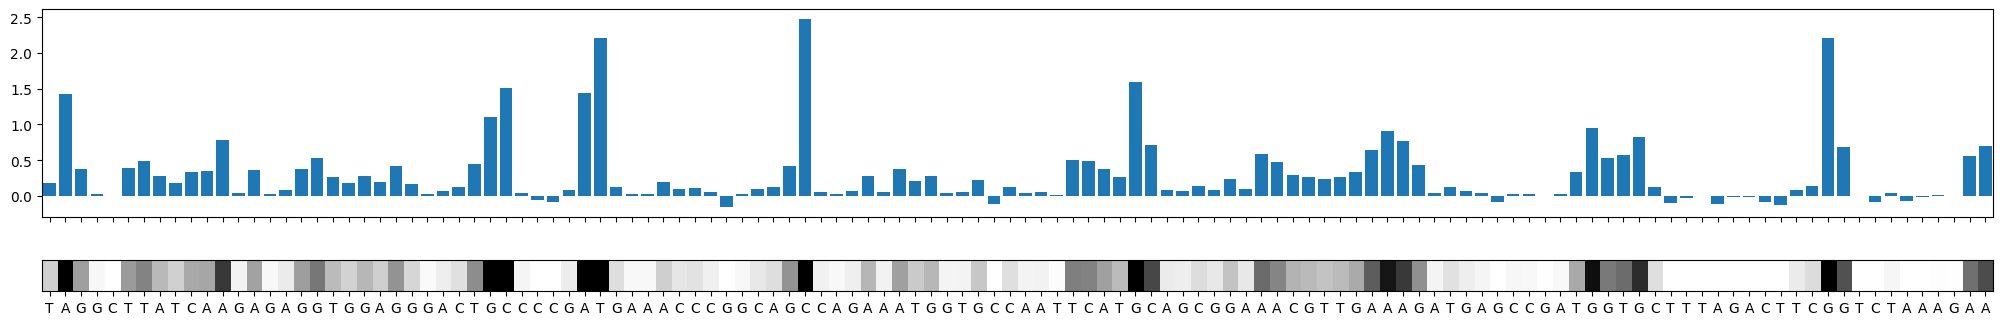

Candidate: 1064
Signal To Noise Ratio: good:5.651
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGCCTGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCAGCAGCGGAAACGTTGAAAGATGAGCCGATGTAGCACAGGAGTTCGCTCCTGTGAAAAGAAACAACAACAACAAC


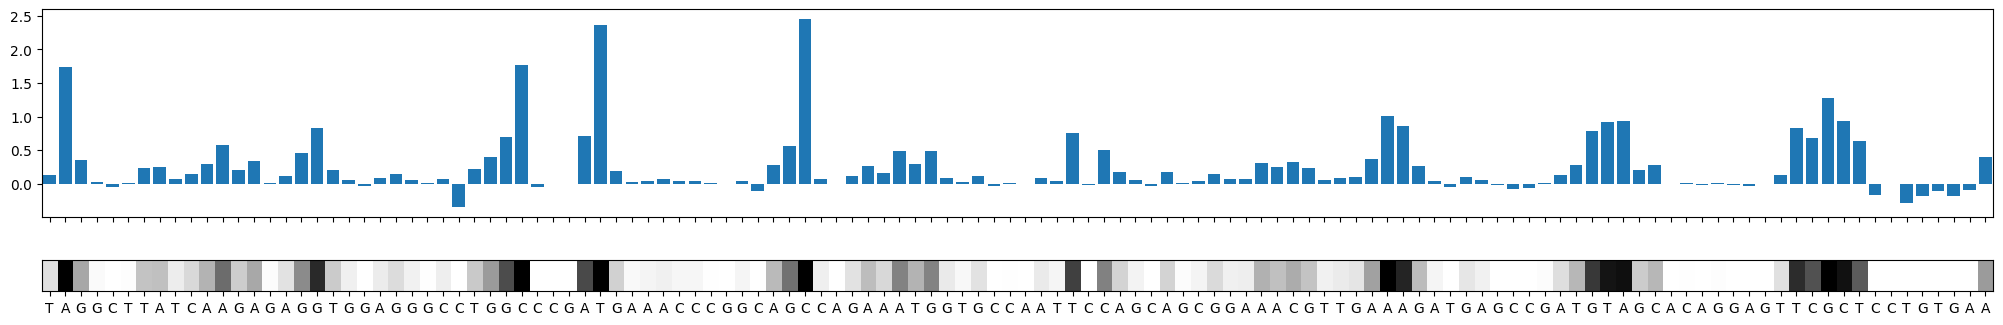

Candidate: 1067
Signal To Noise Ratio: good:8.879
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGCCTGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCTACAGCGGAAACGTTGAAAGATGAGCCGATGAGCGCTAATTCTTCGGAATTAGCAAAAGAAACAACAACAACAAC


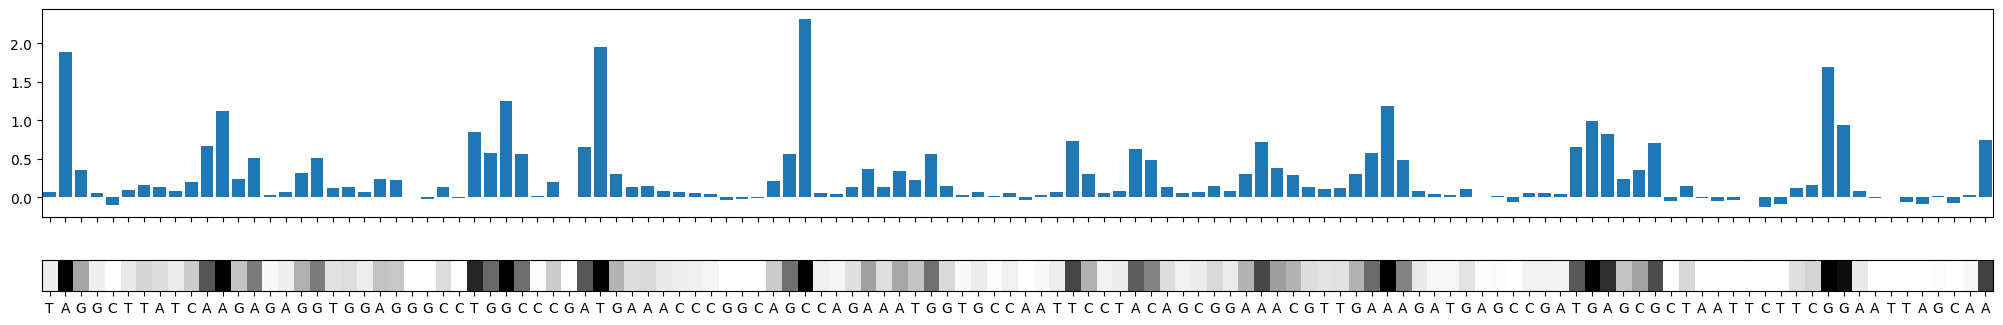

Candidate: 1087
Signal To Noise Ratio: good:8.545
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGTCTGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCAGCAGCGGAAACGTTGAAAGATGAGCCGATGCGAGTTTCTAGTTCGCTAGAAACAAAAGAAACAACAACAACAAC


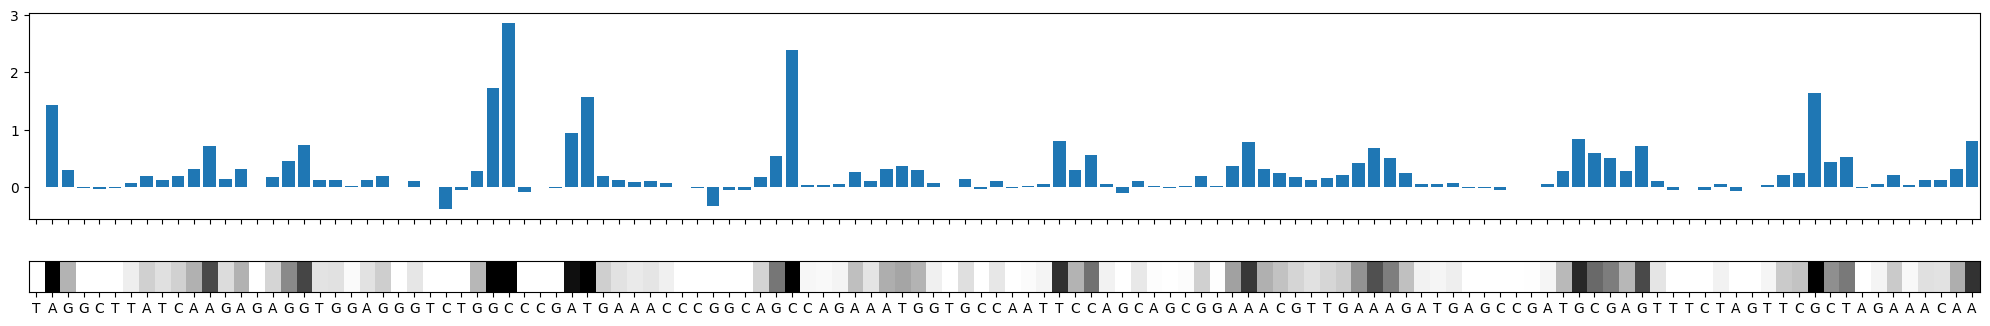

Candidate: 1100
Signal To Noise Ratio: good:5.737
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGAATGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCGGCAGCGGAAACGTTGAAAGATGAGCCGATGATGGTCAACTGTTCGCAGTTGACAAAAGAAACAACAACAACAAC


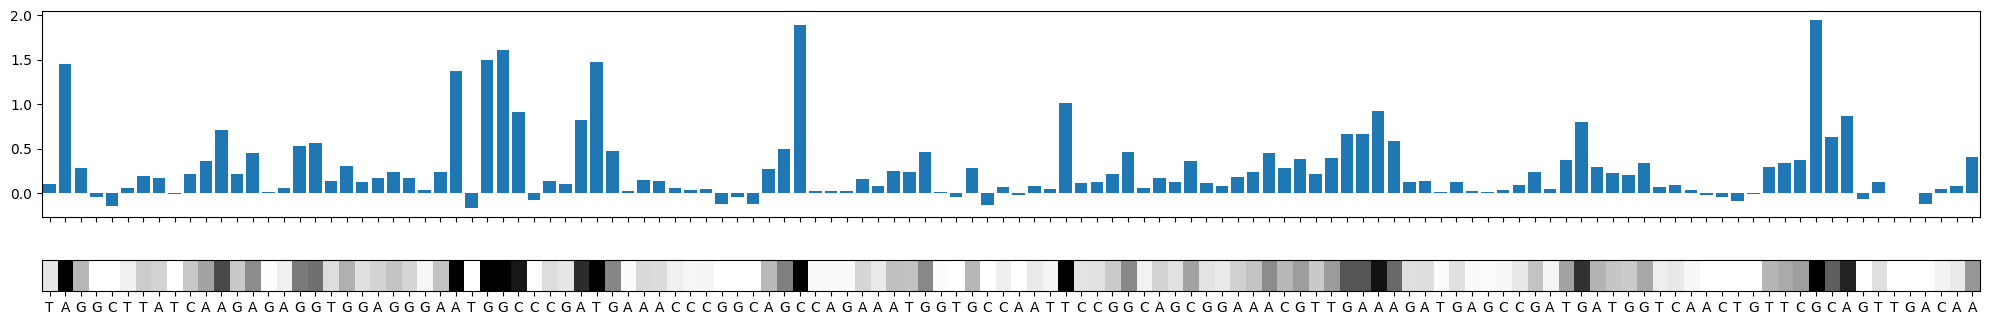

Candidate: 1141
Signal To Noise Ratio: good:7.574
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACCGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCAGCAGCGGAAACGTTGAAAGATGAGCCGATGGCGCGTGCATGTTCGCATGCACGAAAAGAAACAACAACAACAAC


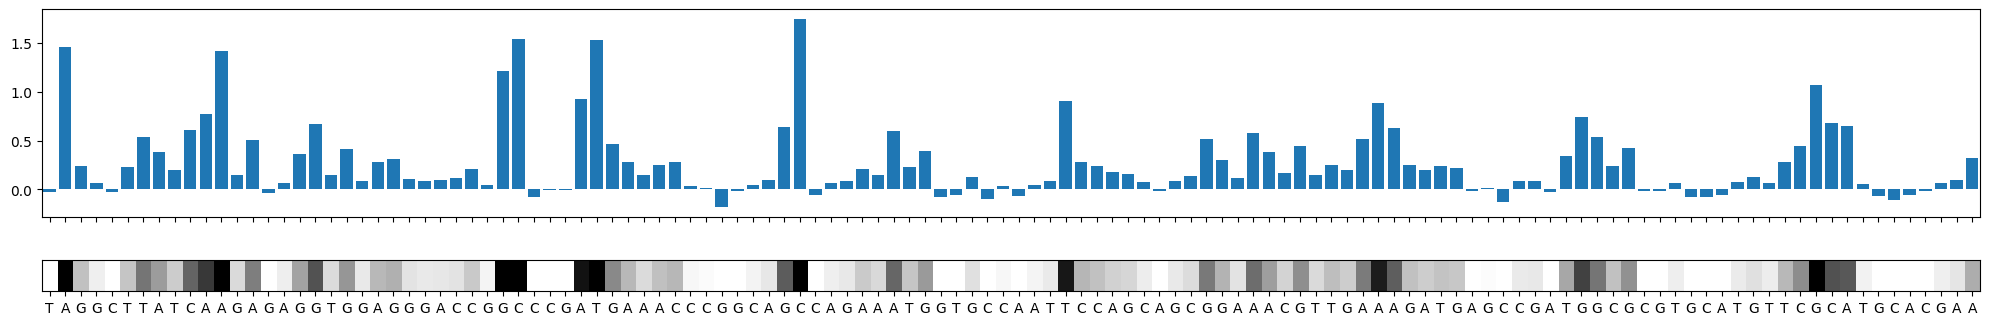

Candidate: 1152
Signal To Noise Ratio: good:5.430
GGGAACGACTCGAGTAGAGTCGAAAAATAGGCTTATCAAGAGAGGTGGAGGGACGGGCCCGATGAAACCCGGCAGCCAGAAATGGTGCCAATTCCGGCAGCGGAAACGTTGAAAGATGAGCCGATGACGCAAAGGACTTCGGTCCTTTGAAAAGAAACAACAACAACAAC


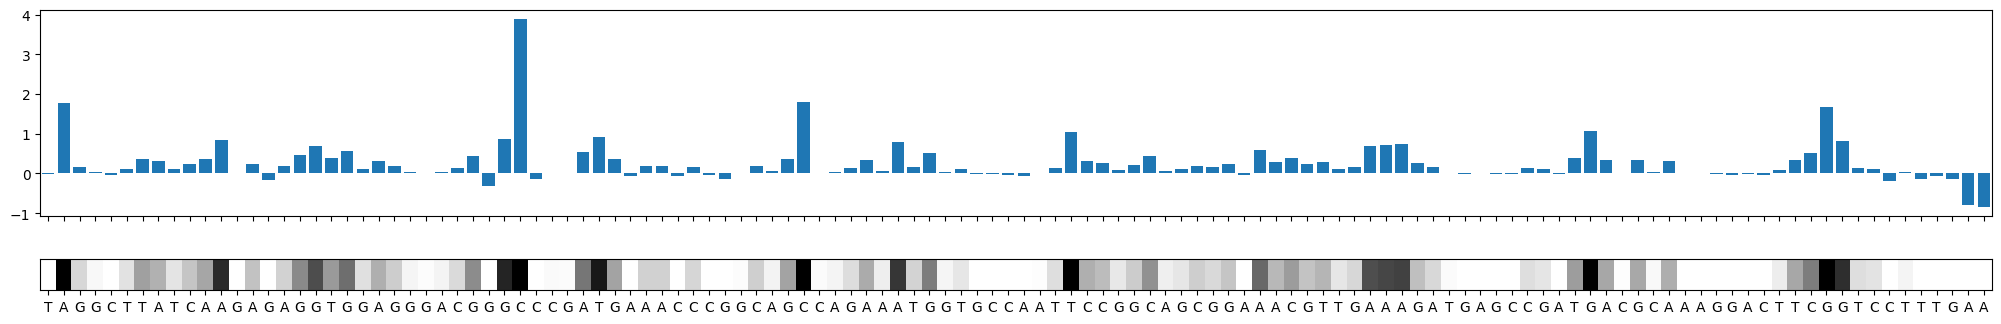

Candidate: 2438
Signal To Noise Ratio: good:7.102
GGGAACGACTCGAGTAGAGTCGAAAAGCCTATATTAACCTTGACCAGGGCTTTAACTGCAGAGTCACATGTTGACACTGACTTAACAAAGCCTTACATTAAGTGGGATTTGTTAAAATCTGACTTCAACACCCTCAGTTCGCTGAGGGTAAAAGAAACAACAACAACAAC


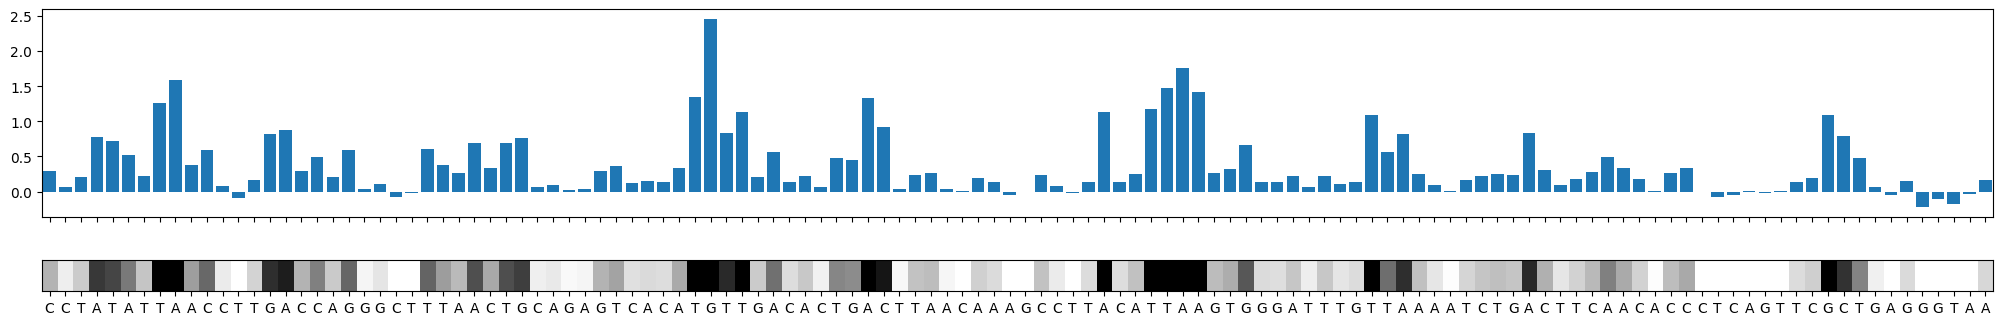

Candidate: 4666
Signal To Noise Ratio: good:8.588
GGGAACGACTCGAGTAGAGTCGAAAAATAACCACTTACCCGGGTCAGGGTTTAAATGGTTACACTGTAGAGGAGGCAAAGACAGTGCTTAAAAAGTGTAAAAGTGCCTTTTACATTCTACCATCTAACACATAGTACTTCGGTACTATGAAAAGAAACAACAACAACAAC


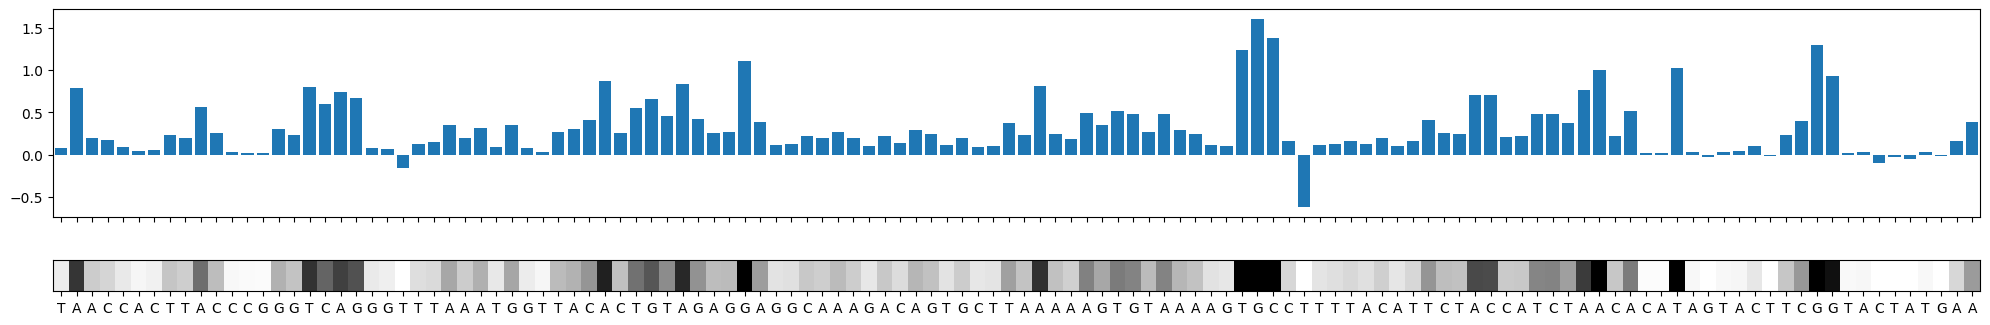

Candidate: 6132
Signal To Noise Ratio: strong:10.248
GGGAACGACTCGAGTAGAGTCGAAAACCACTCAAACATTGAAACTCGACTCCGCAAGGGAGGTAGGACTAGATGTTTTGGAGGCTGTGTGTTTGCCTATGTTGGCTGCTATAATAAGCGTGCCTACTGAGCATTATCTTCGGATAATGCAAAAGAAACAACAACAACAAC


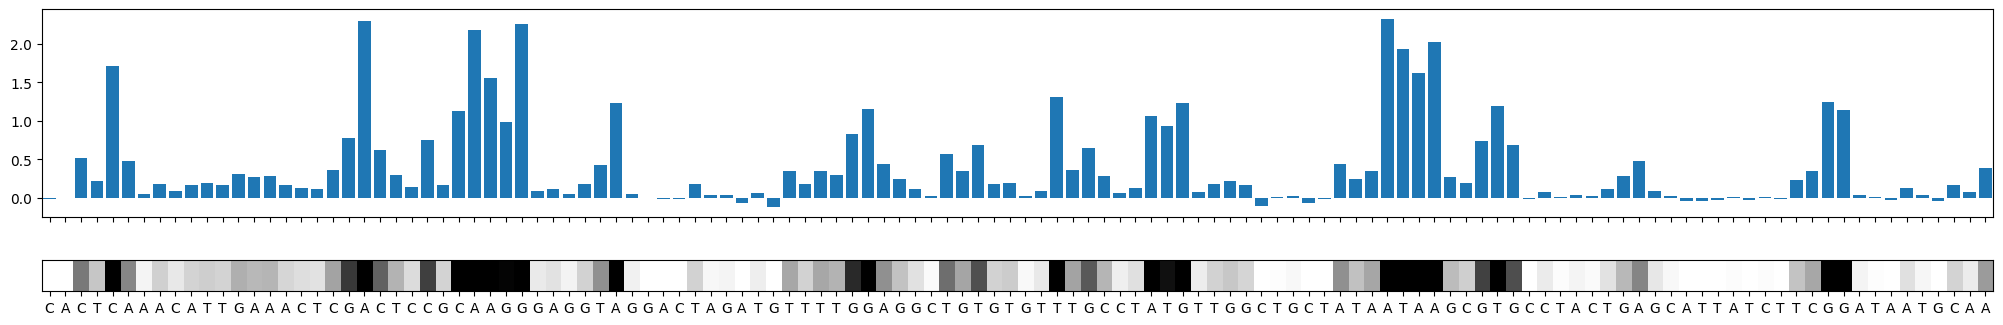

Candidate: 6165
Signal To Noise Ratio: strong:10.213
GGGAACGACTCGAGTAGAGTCGAAAAAAGGGAAAGCCCGTAAAAGGTGCTTGGAACATTGGACAACAGAGATCAGTTTTAACACCACTGTGTGGTTTTCCCTCACAGGCTGCTGGTGTTATCAGATAAAGACGTTAGTTCGCTAACGTCAAAAGAAACAACAACAACAAC


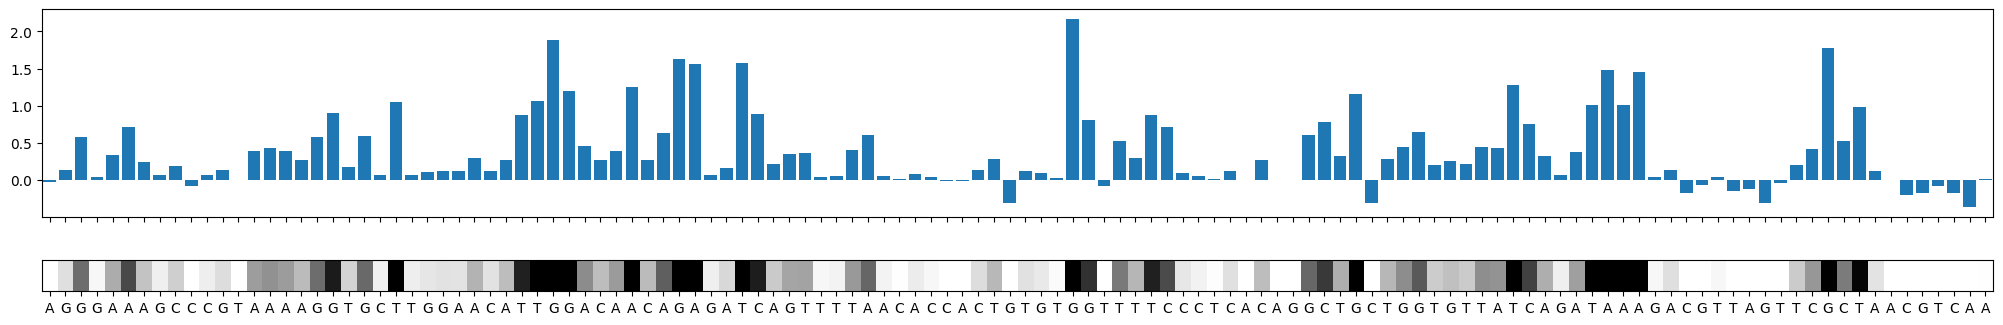

Candidate: 6527
Signal To Noise Ratio: good:6.003
GGGAACGACTCGAGTAGAGTCGAAAAACAAAGGACCAGTGACTGATGTTTTCTACAAGGAAACATCTTACACTACAACCATCAAGCCTGTGTCGTATAAACTCGATGGAGTTACTTACACAGAGATATCGGAGGAACTTCGGTTCCTCCAAAAGAAACAACAACAACAAC


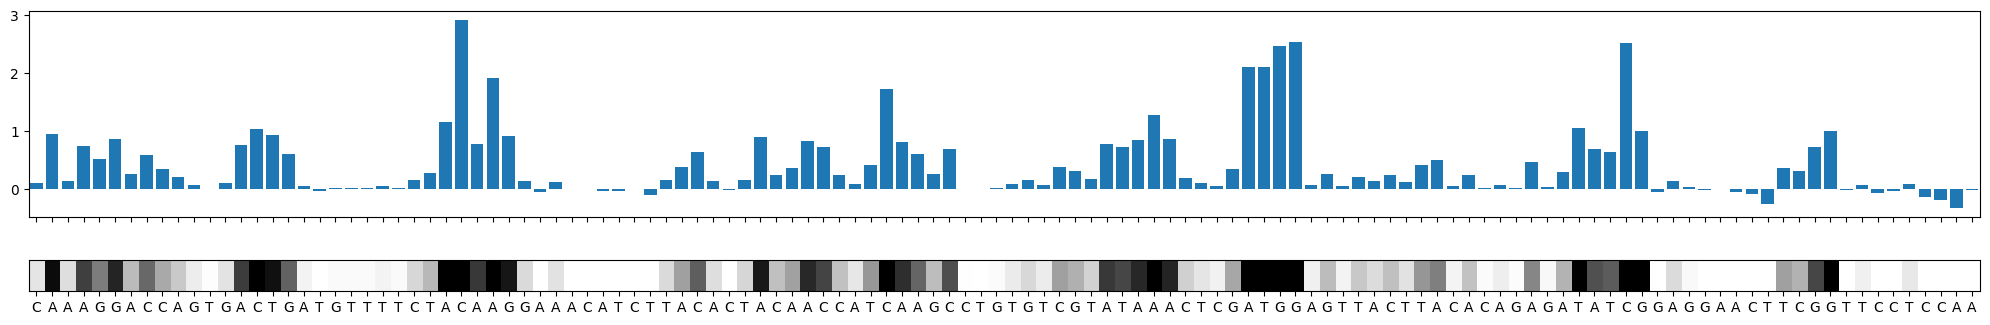

Candidate: 6764
Signal To Noise Ratio: good:9.686
GGGAACGACTCGAGTAGAGTCGAAAAGTTTTAAACTTATGCTTAAGGCCACATTATTGTGCGTTCTTGCTGCATTGGTTTGTTATATCGTTATGCCAGTACATACATTGTCAATCCATGATGGTTAAGGACCGCAGGTTCGCCTGCGGTAAAAGAAACAACAACAACAAC


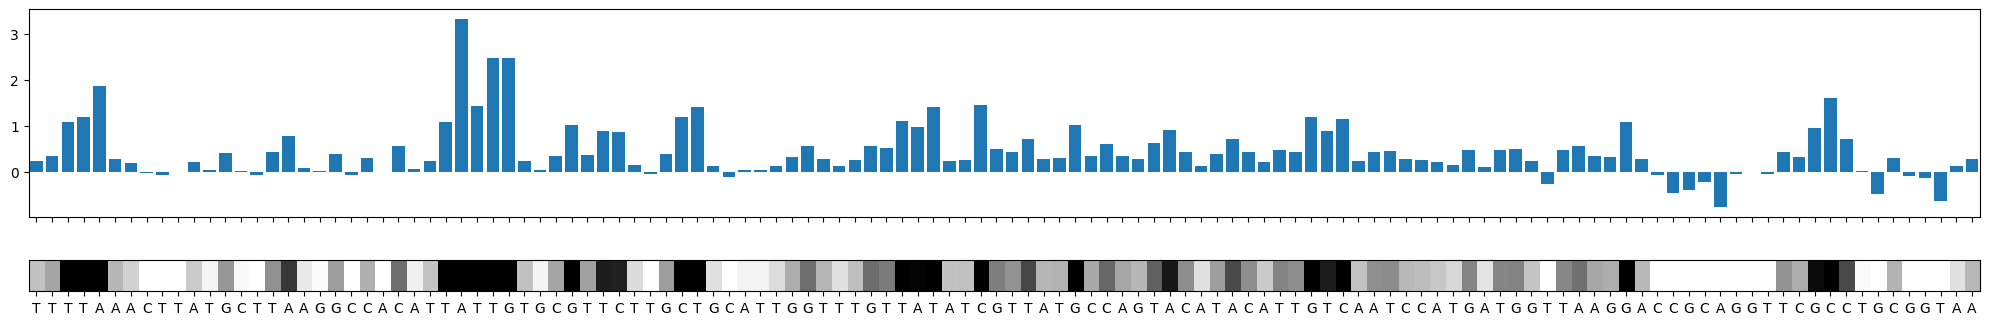

Candidate: 7243
Signal To Noise Ratio: good:9.445
GGGAACGACTCGAGTAGAGTCGAAAAAGACTATTTATAACTTGGTTAAAGATTGTCCAGCGGTTGCTGTCCATGACTTTTTCAAGTTTAGAGTAGATGGTGACATGGTACCACATATATCACGTCAAGGCTCTCGAGTTCGCTCGAGAGAAAAGAAACAACAACAACAAC


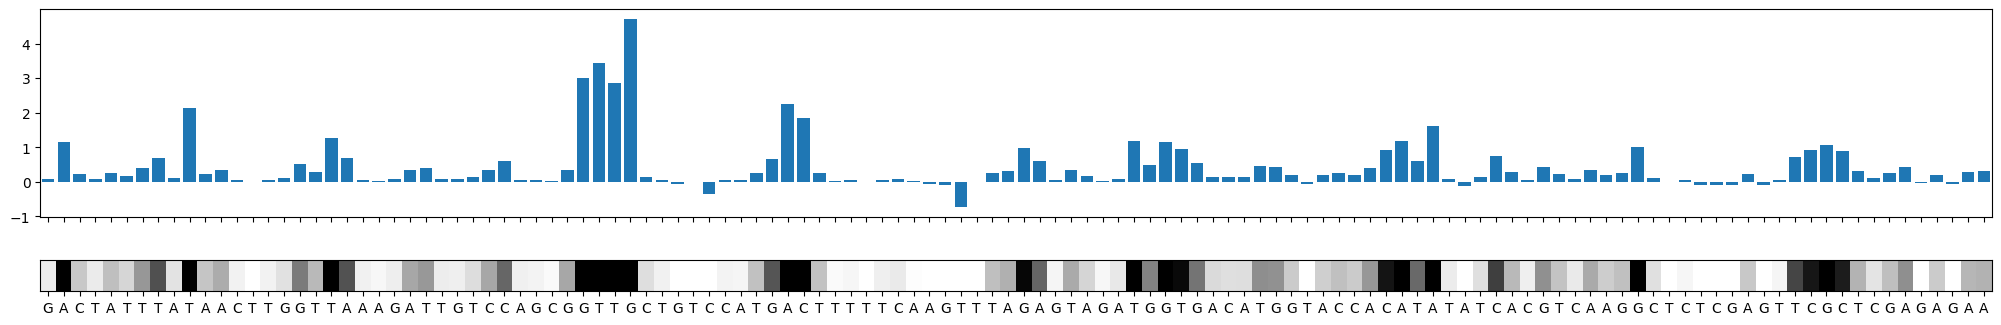

Candidate: 7379
Signal To Noise Ratio: good:6.261
GGGAACGACTCGAGTAGAGTCGAAAAACTCCACACCTTATGGGTTGGGATTATCCAAAATGTGACAGAGCCATGCCTAACATGCTTAGGATAATGGCCTCTCTTGTTCTTGCTCGCAAACATAACATACCTGATCTCTTCGGAGATCAGAAAAGAAACAACAACAACAAC


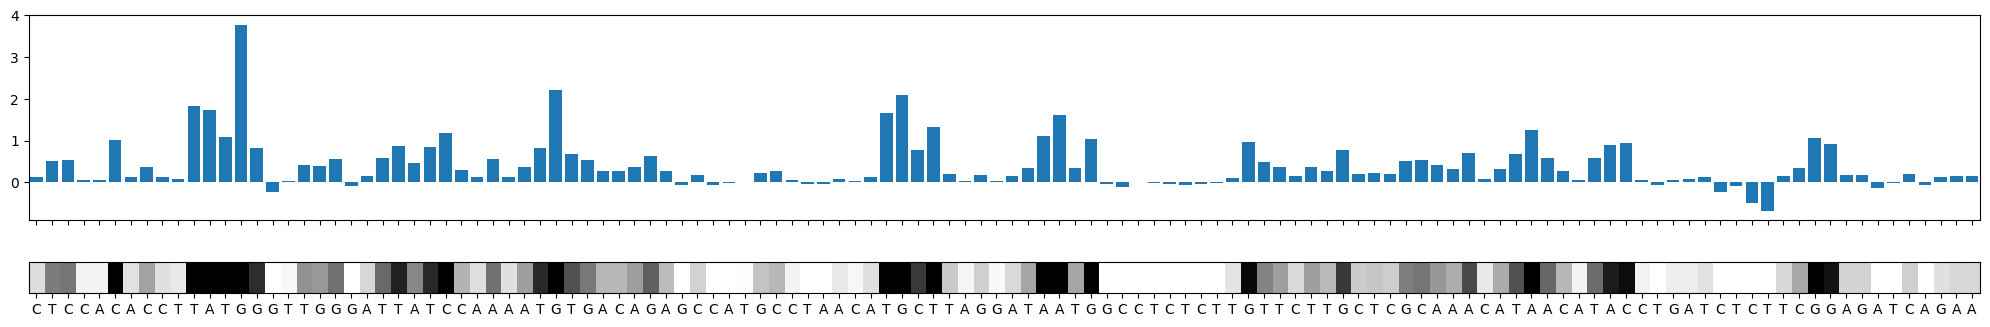

Candidate: 8073
Signal To Noise Ratio: good:9.872
GGGAACGACTCGAGTAGAGTCGAAAATTTAACGCTGAGGGTGATGCATCCTGGTCTTCTACTATGATCTTCTCTCTTCACCCCGTCGAGTGTGACGAGGAGTGTTCTGAAGTAGAGGCTTCAGATTATACCACTTCGTTCGCGAAGTGGAAAAGAAACAACAACAACAAC


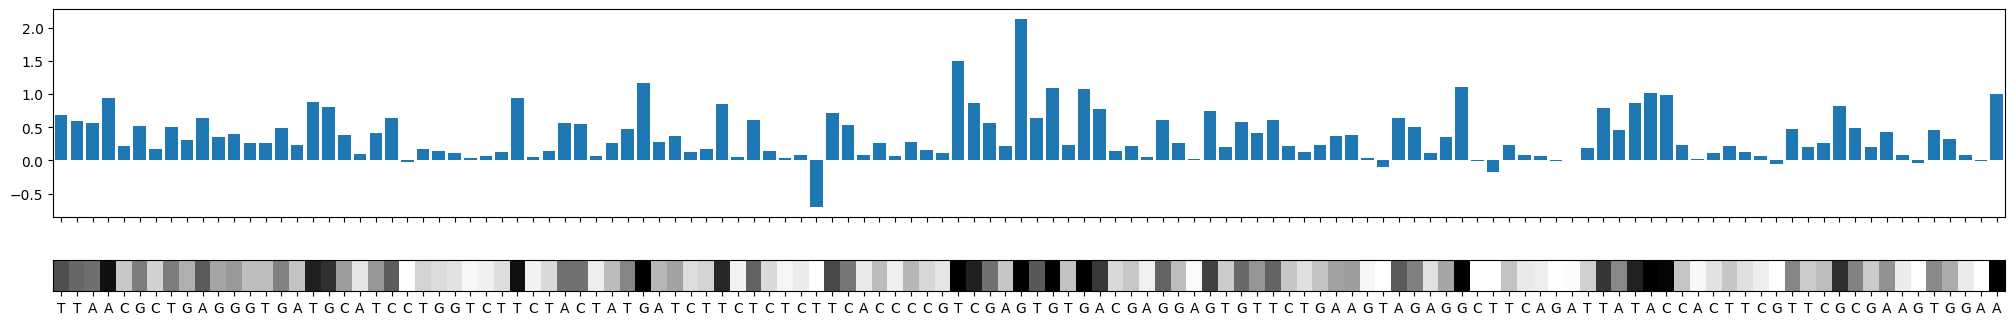

Candidate: 8329
Signal To Noise Ratio: good:5.296
GGGAACGACTCGAGTAGAGTCGAAAAACTAAGAAATACACTTACTCCTTCTTGCCTAAAGAAGACGGCGATGTGTTGTTGGCTGAGTTTGACACTTATGACCCTATTTATAAGAATGGTGCCATGTATAACTTGCACTTCGGTGCAAGTAAAAGAAACAACAACAACAAC


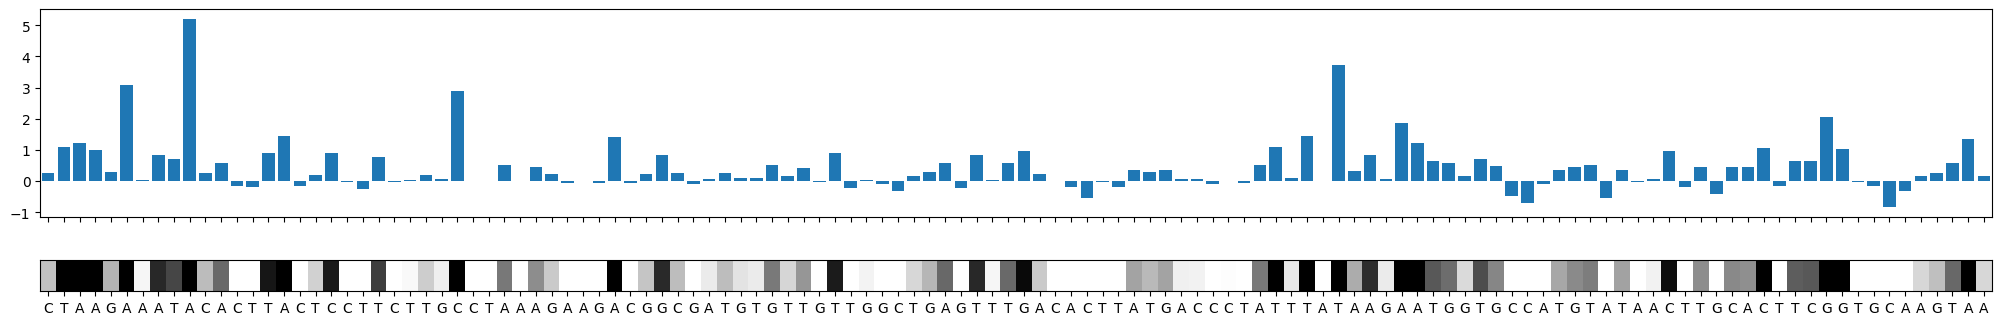

Candidate: 8666
Signal To Noise Ratio: good:8.091
GGGAACGACTCGAGTAGAGTCGAAAAACTTATGCAGCTCTTAGAAACTCTTTAACTAATGATGCCTATTCACGATTTTTGGGGTTGTTTAACAAGTATAAGTACTTCTCTGGTGCTATGGAAACAGTAATCACTGACTTCGGTCAGTGAAAAAGAAACAACAACAACAAC


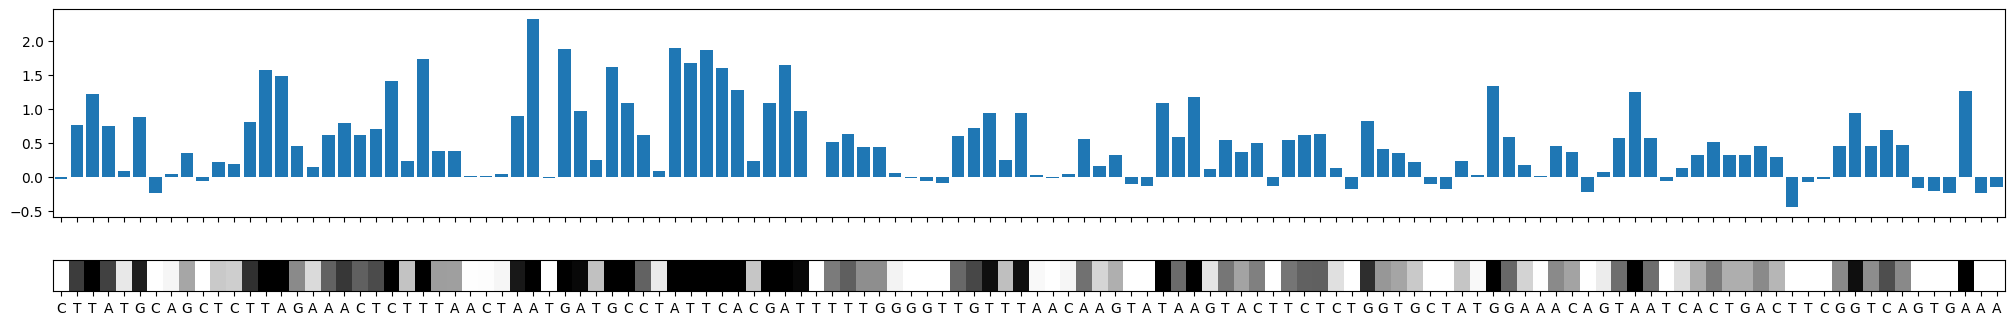

Candidate: 9796
Signal To Noise Ratio: good:5.278
GGGAACGACTCGAGTAGAGTCGAAAAGGGGCTAGCCGGTGGGTGTTCCTCCCCCCGAGAGGGGAAGAGTGAGGCTTATCCCGGGGAACCCGGCGAATGCCCCCACATAGCAGAGTCCGGGACCCCCATACCTGGTGGTTCGCCACCAGGAAAAGAAACAACAACAACAAC


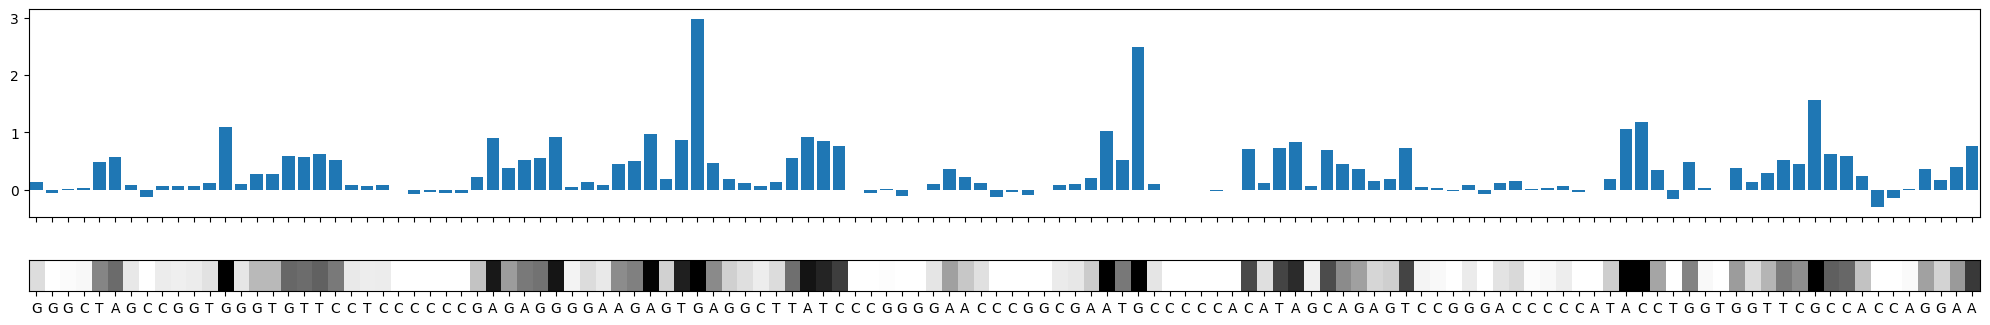

Candidate: 9928
Signal To Noise Ratio: good:6.898
GGGAACGACTCGAGTAGAGTCGAAAAAGGACGTCCTCCCTGTCTCCTCGGTTCTTCTTCGATCCGGACCGGCTCATCTCGGCAAAAGGCGGCAGTCCTCAGTGCTCTTACTCTTTCCTATAAAGAGACGCGTGTGAGTTCGCTCACACGAAAAGAAACAACAACAACAAC


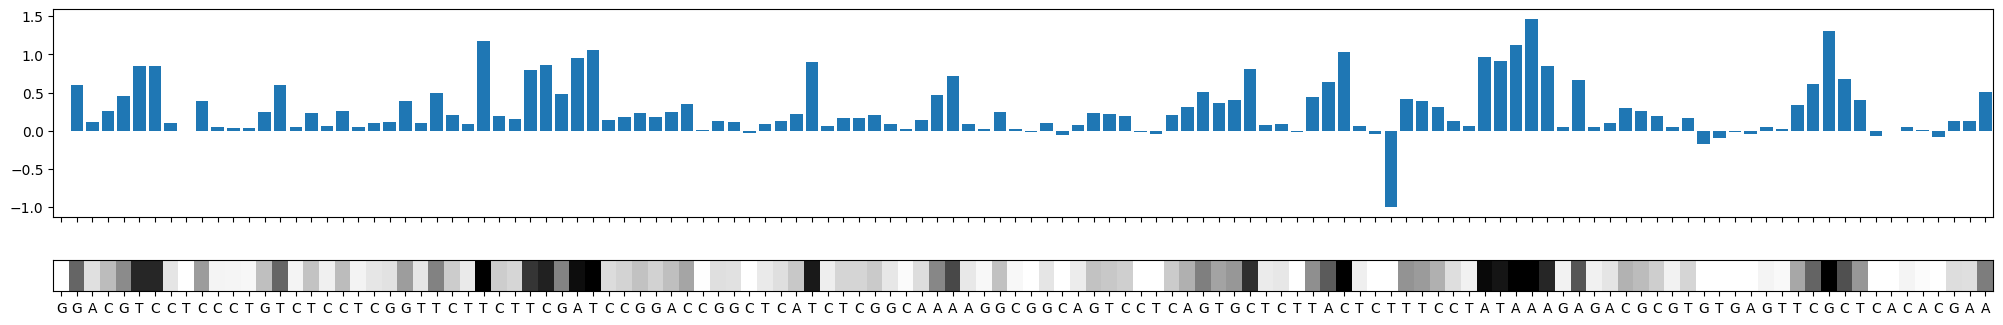

Candidate: 10198
Signal To Noise Ratio: good:6.858
GGGAACGACTCGAGTAGAGTCGAAAATCCGAGGGGCCCAACCACCAAGTTTGGAGAGCACTCCGGGCCGAATGGTCGAGTAGCACTCAGAGGGAGGAATCCACACGGAGTAGAGCAGAGAAATCACAACCATACCCCTTCGGGGGTATGAAAAGAAACAACAACAACAAC


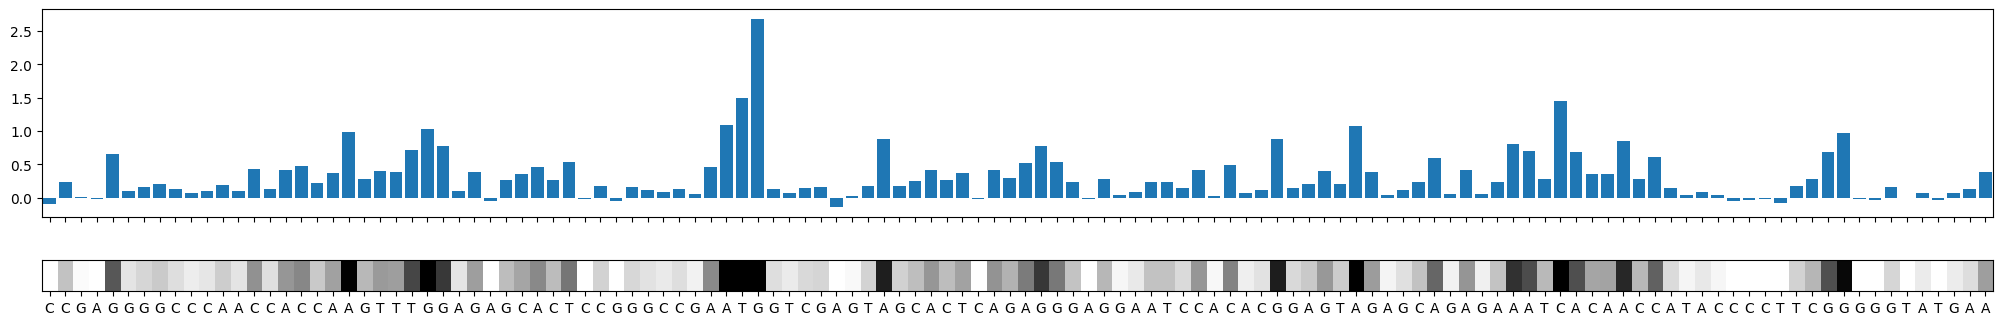

Candidate: 10244
Signal To Noise Ratio: strong:11.548
GGGAACGACTCGAGTAGAGTCGAAAAGGCTGGGCAACATTCCGAGGGGACCGTCCCCTCGGTAATGGCGAATGGGACCCACAAACCTCTCTAGATTCCGATAGAGAATCGAGAGGAAAGTGGCTCTAGGGGAAGAGATTCGTCTCTTCCAAAAGAAACAACAACAACAAC


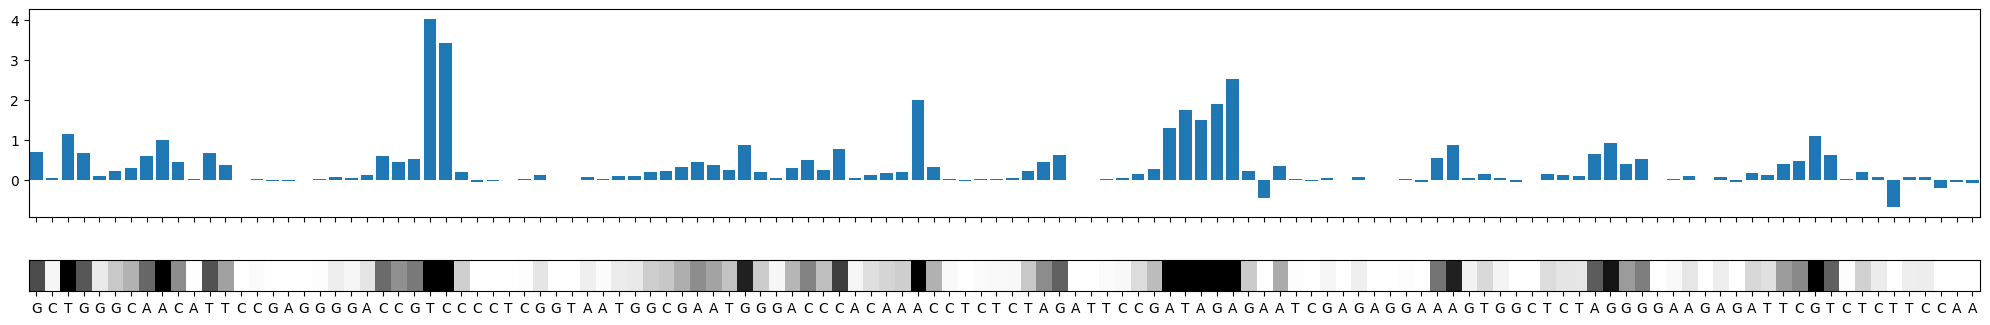

Candidate: 10443
Signal To Noise Ratio: strong:13.644
GGGAACGACTCGAGTAGAGTCGAAAACCTTCGAGGGGGTTCACACCTCCAGTCGGCGGGCCGGCTACTCTTCTTTCCCTTCTCTCGTCTTCCTCGGTCAACCTCTTAAGTTCCTCTTCTTCTTCCTCACGAGTTAGGTTCGCCTAACTCAAAAGAAACAACAACAACAAC


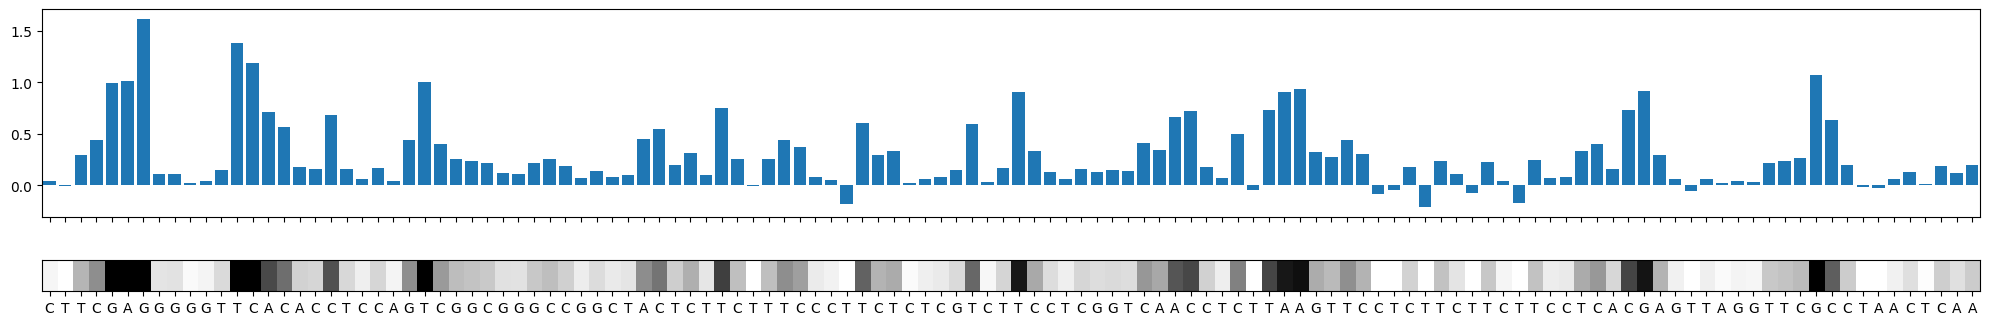

Candidate: 10545
Signal To Noise Ratio: good:7.124
GGGAACGACTCGAGTAGAGTCGAAAAGAAGTGACGGGGGGGGGTCACTAGGAACACTGGGGTCCAGTGGATCCGTGGGACTACCCTCTCCACCCTCCCAACACACTCCTTCCCCCCTGCGGGGCTTACGCAAGGGTGTTCGCACCCTTGAAAAGAAACAACAACAACAAC


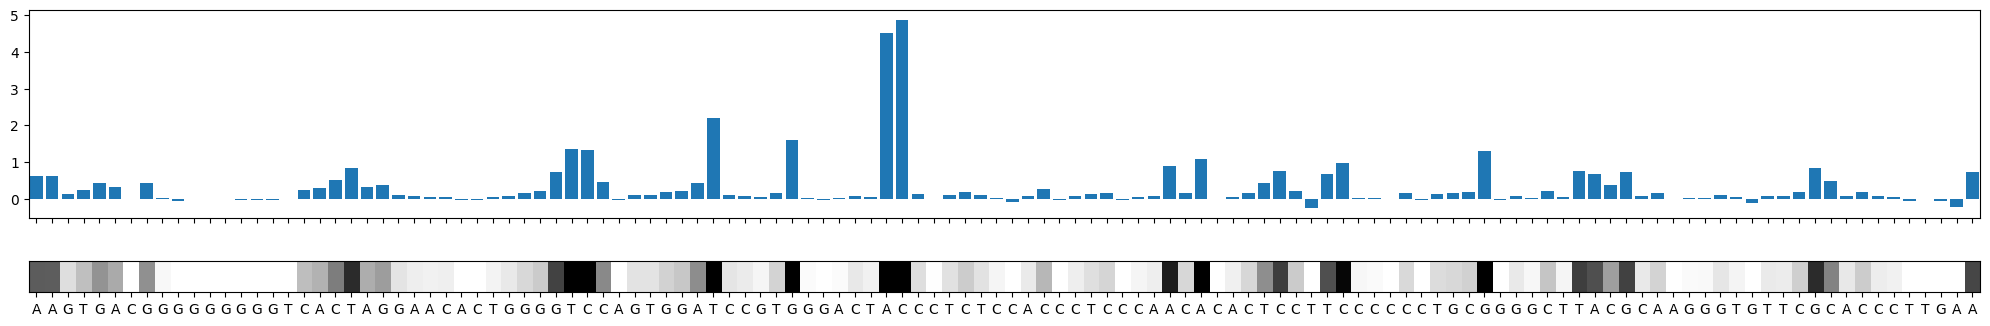

Candidate: 10885
Signal To Noise Ratio: good:5.710
GGGAACGACTCGAGTAGAGTCGAAAACCGGCTGGGCAACGATCCGAGGGGACTATCCCTCTCGAGAATCGGCAAATGGGCCCCTCGCTCGTATCTCCGAGAGGAGACGAGAAGGAGGCGGATCTCCAAACAATGGCGTTCGCGCCATTGAAAAGAAACAACAACAACAAC


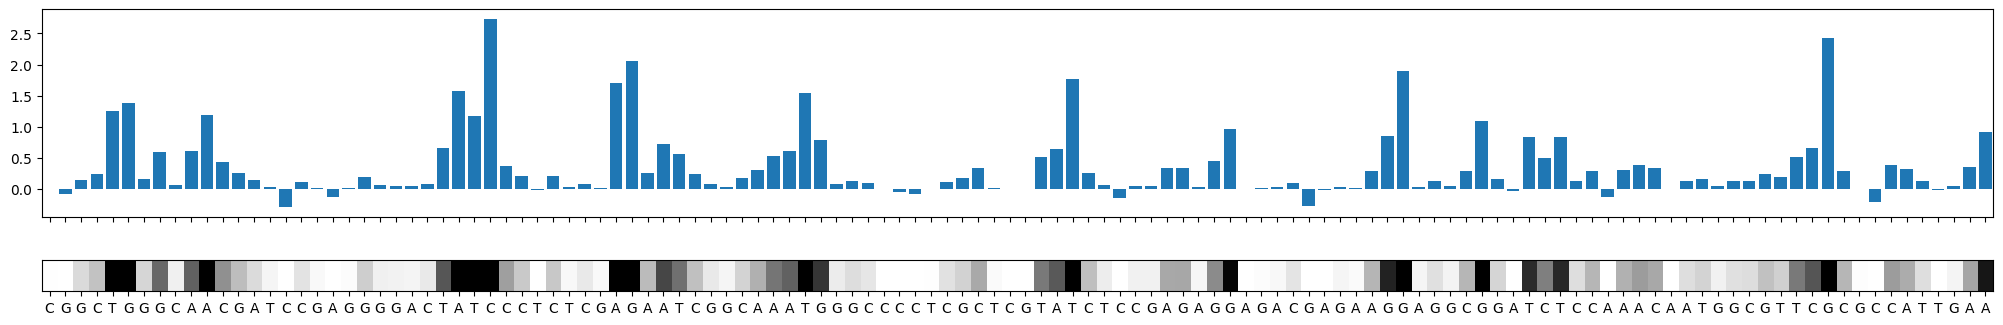

Candidate: 10886
Signal To Noise Ratio: strong:12.455
GGGAACGACTCGAGTAGAGTCGAAAAAACGATCCGAGGGGACTATCCCTCTCGAGAATCGGCAAATGGGCCCCTCGCTCGTATCTCCGAGAGGAGACGAGAAGGAGGCGGATCTCCCTTTGCCATCACGCGTAGGAGTTCGCTCCTACGAAAAGAAACAACAACAACAAC


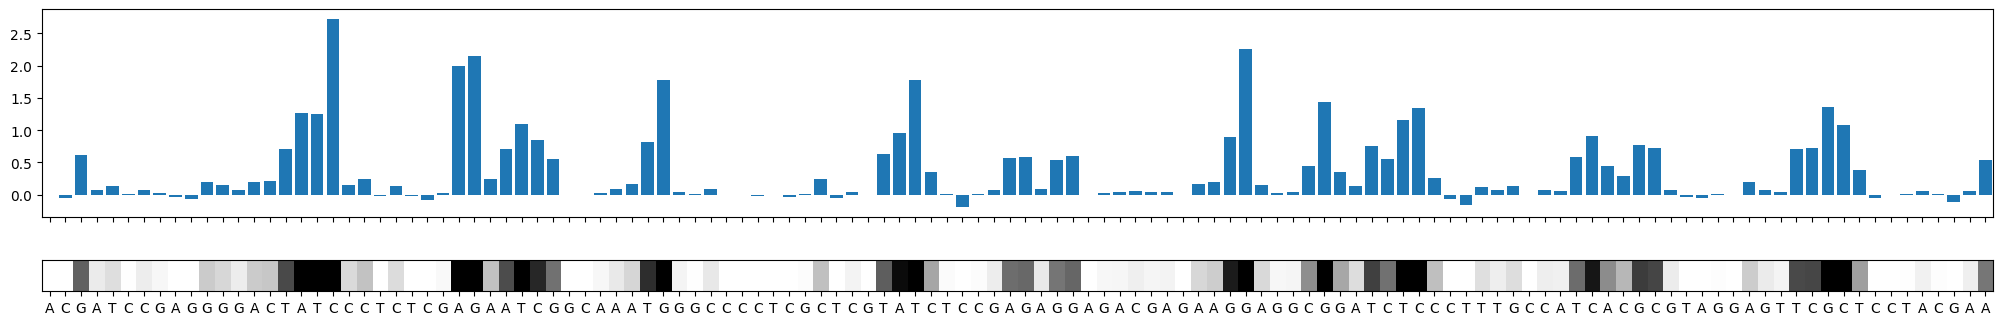

Candidate: 10895
Signal To Noise Ratio: good:9.753
GGGAACGACTCGAGTAGAGTCGAAAACTTTGCCATCCGAGGGGACTGCGTCCTCCTTACGGATGCCCAGGTCGGACCGCGAGGAGGTGGAGATCCCATGCCGACCCGAAGAGGAAAGGAGGACACGTAAGACATTAGTTCGCTAATGTCAAAAGAAACAACAACAACAAC


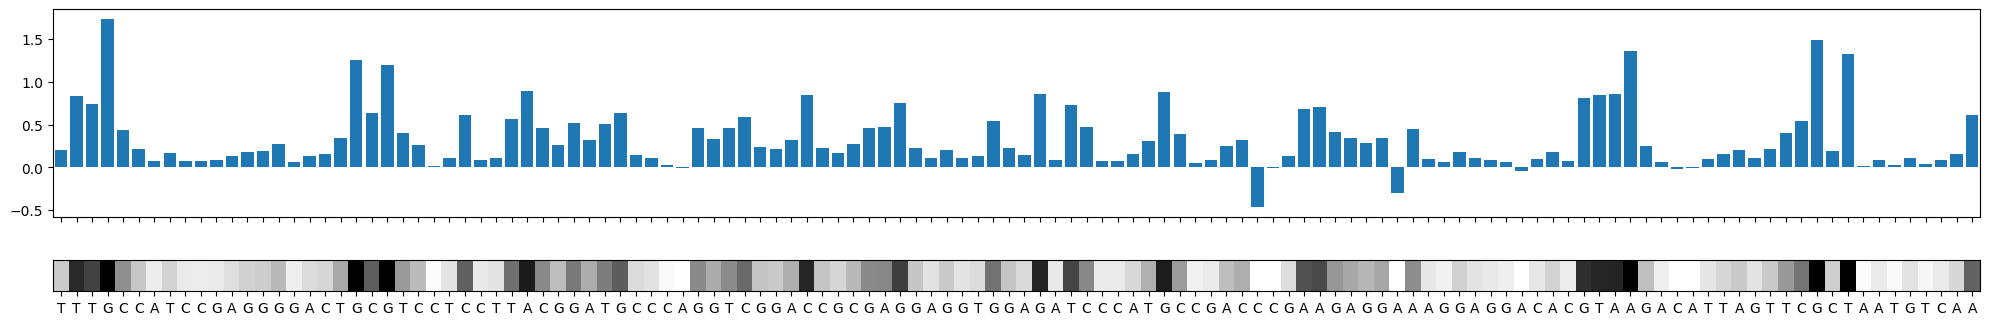

Candidate: 11033
Signal To Noise Ratio: good:5.325
GGGAACGACTCGAGTAGAGTCGAAAATCCCCCGCCATCCCCTGACGGAGAAAACTGGTCCCGATAGGGGCACCCACAATAGGATGGCAGGAGGGGACTGCGGGTCCGTCGTTCCATCCTTTTCTTACCACCGTGATGTTCGCATCACGGAAAAGAAACAACAACAACAAC


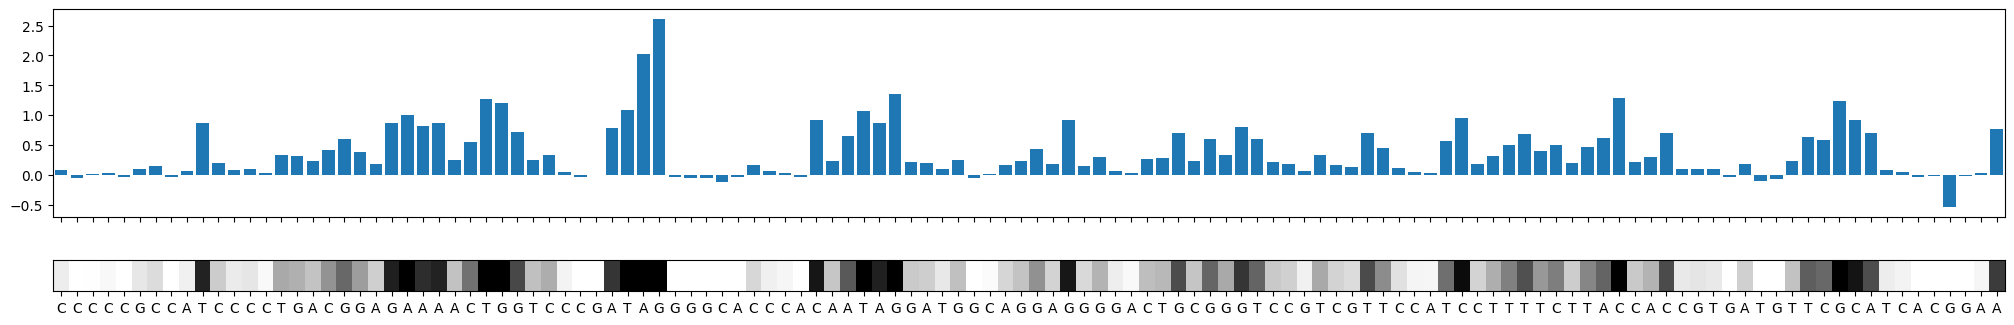

Candidate: 11047
Signal To Noise Ratio: strong:21.320
GGGAACGACTCGAGTAGAGTCGAAAAGATCCGAGGGGACTGTCCCTCTCGAGAATCGGCAAATGGGGCCCCTCGCTCGTATCTCCGAGAGGAGACGAGAAGGAGGTGGATCTCCCTTTGCCATCCGTGCCTACGTACTTCGGTACGTAGAAAAGAAACAACAACAACAAC


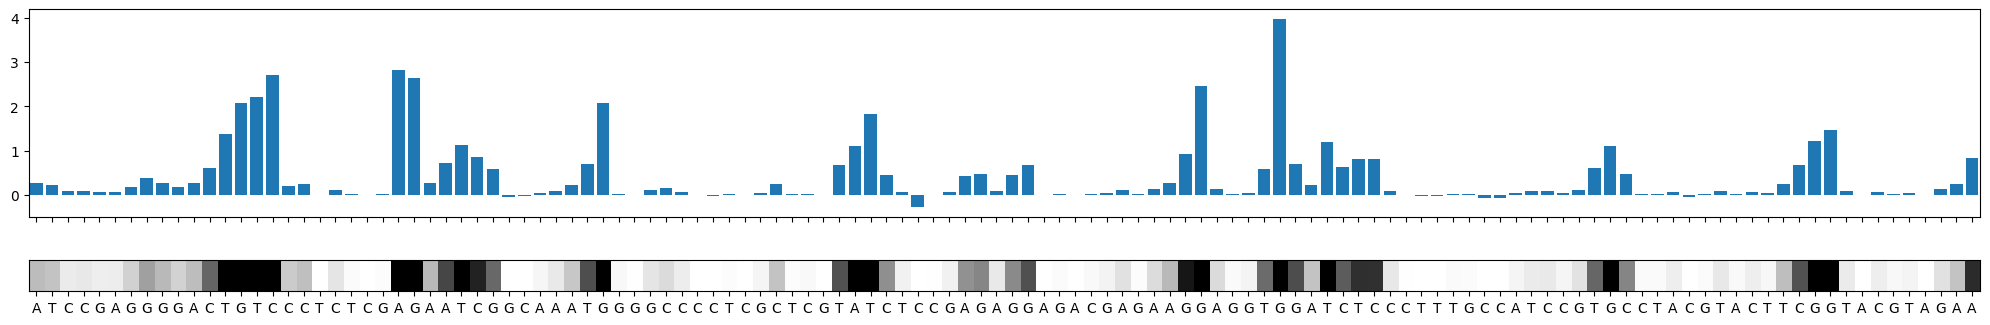

Candidate: 11084
Signal To Noise Ratio: good:7.549
GGGAACGACTCGAGTAGAGTCGAAAACCACCGGGCGCTCCCCTCGGCGGGCCGTCCATTGGGTTCACACCCCCAGGCCGCGGGCCGGCTACTCTTCTTTCTCTTTCGTCGTCATCCCTGGCCAGCCTACGTACTACCTTCGGGTAGTACAAAAGAAACAACAACAACAAC


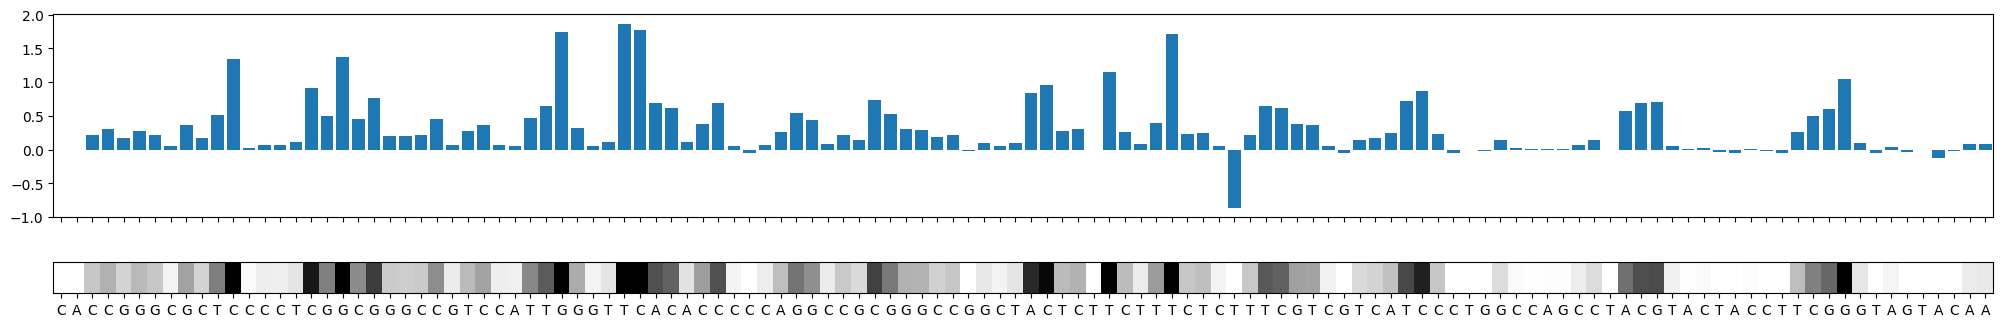

Candidate: 11142
Signal To Noise Ratio: good:6.367
GGGAACGACTCGAGTAGAGTCGAAAAATGGGCCGCTTCCGGCGAACGAGCCCGAAGAGCGAGTGGGGGAGAACTCCCGAGAGTTGGGAGACAGAAAGAGGGCGAGTGATCTCGGAAGGAATCCCCCTTATACTGACGTTCGCGTCAGTAAAAAGAAACAACAACAACAAC


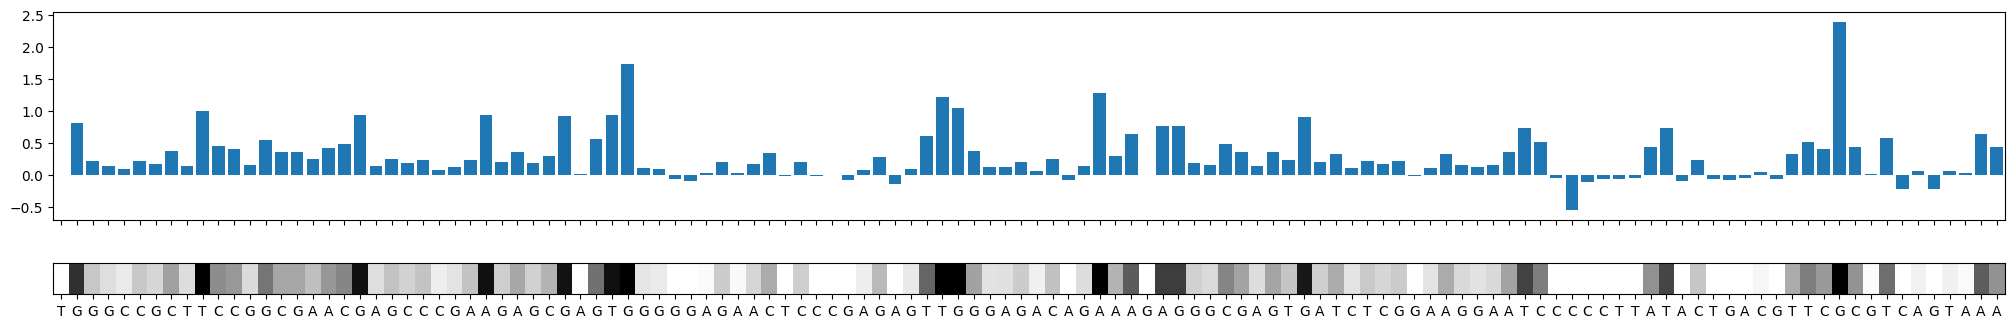

Candidate: 11881
Signal To Noise Ratio: good:7.391
GGGAACGACTCGAGTAGAGTCGAAAACGGGGCTAGCGAGTGGATGTTCCGCCTCCCCAGGGTCCCGAGTGAGGCTTATCCCGGGGAACTCGGCCCAGTCCCGAGATAGCCGCGTCCGAGGTTCCCAGGACTTTGCTCTTCGGAGCAAAGAAAAGAAACAACAACAACAAC


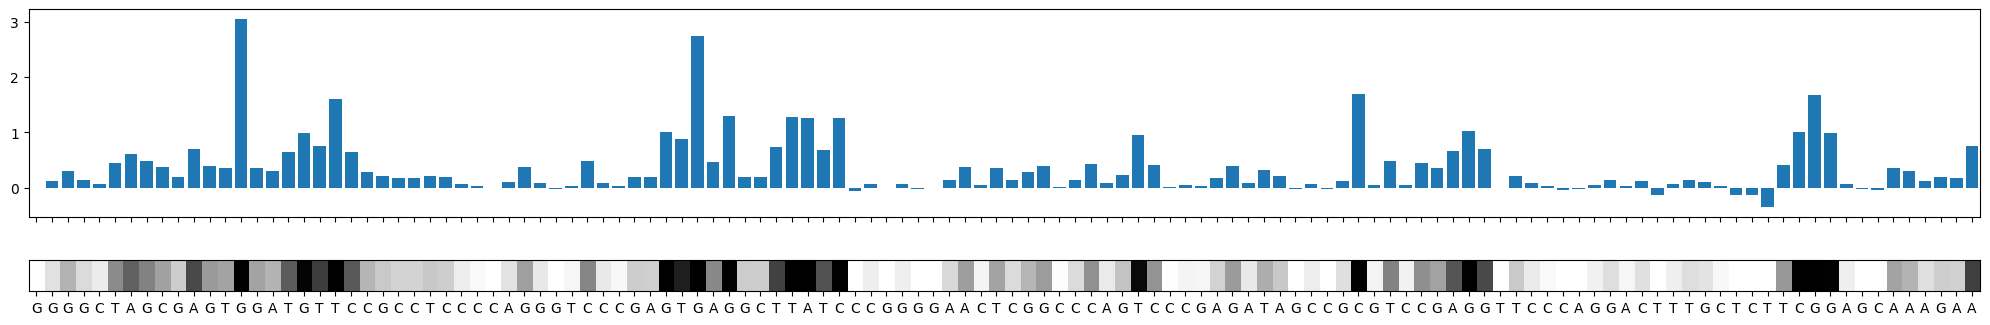

Candidate: 11892
Signal To Noise Ratio: good:6.386
GGGAACGACTCGAGTAGAGTCGAAAAACTCGGCCCAGTCCCGAGATGGCCGCGTCCGAGGTTCCCATTCAAAGGGGAGAGGGGGGGACTTGGAGCACAGGGGTCCAGTTCAGTCCGTGGGATTACCGTACTTCTCAGTTCGCTGAGAAGAAAAGAAACAACAACAACAAC


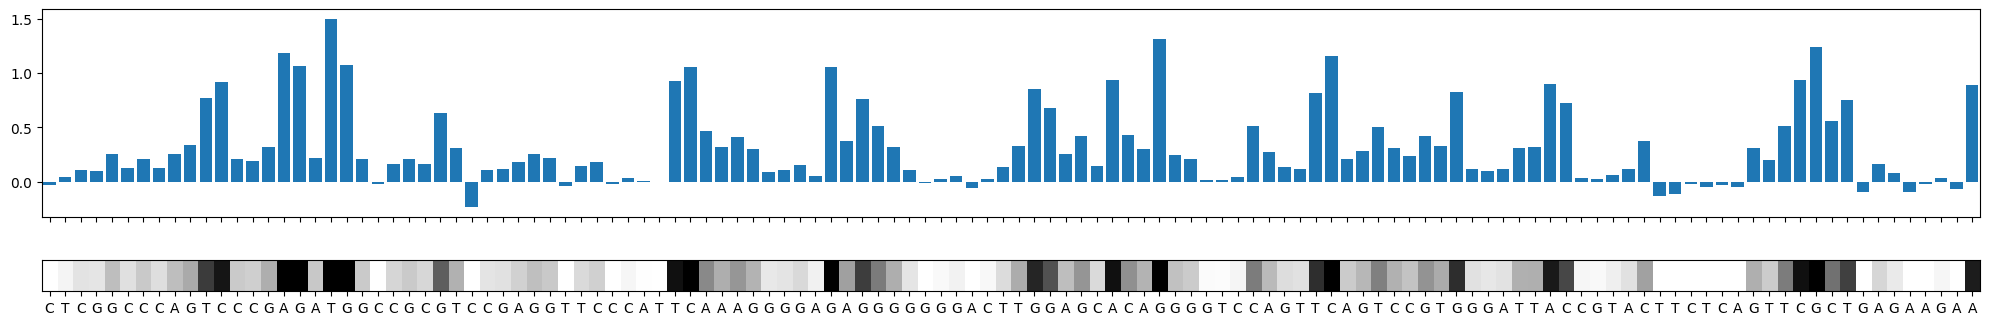

Candidate: 12161
Signal To Noise Ratio: good:8.449
GGGAACGACTCGAGTAGAGTCGAAAACGAGAGAAAACTGGCTCTCCCTTAGCCATCCGAGTGGACGTCTGTCCTCCTACGGATGCCCAGGTCGGACCGCGGGGAGGTGGAGATGCCATGCCGACCCTAGCTCCGTACTTCGGTACGGAGAAAAGAAACAACAACAACAAC


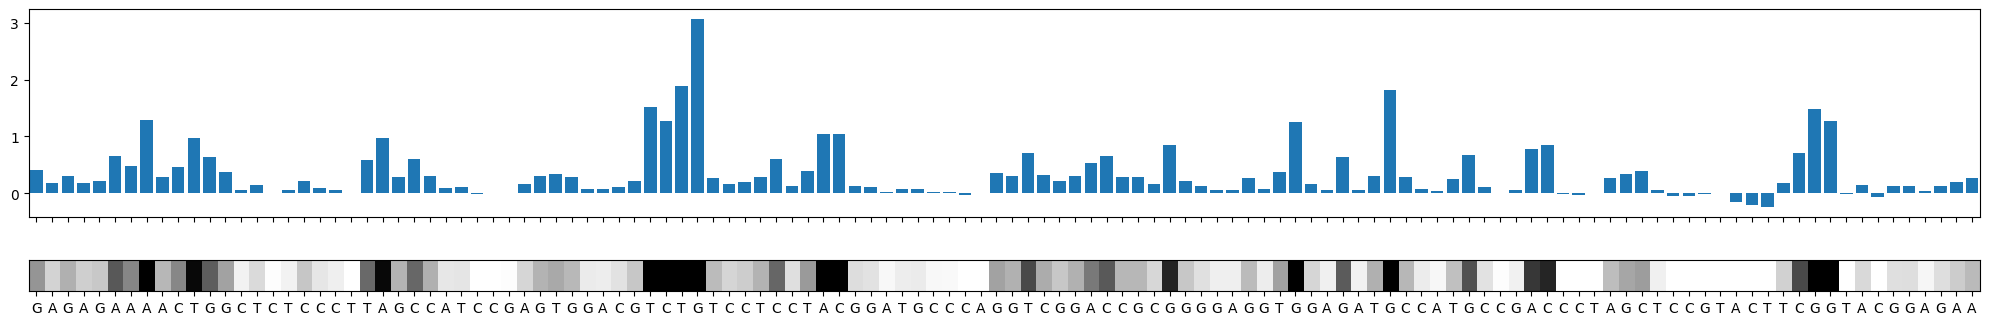

In [13]:
# First we grab the data associated with those candidate sequences
candidates = data.iloc[candidate_indexes]

# For each candidate, we will plot the reactivity on a bar chart and heatmap
for i in range(len(candidate_indexes)):
    # Get the data for this candidate
    candidate = candidates.iloc[i]
    # Get the actual sequence of this candidate
    sequence = rdat.constructs['15k'].data[candidate_indexes[i]].annotations['sequence'][0]
    signal = rdat.constructs['15k'].data[candidate_indexes[i]].annotations['signal_to_noise'][0]
    # Get the sequence offset of the data (the data doesn't start at the beginning of the sequence, it maps a middle region because of various experimental requirements)
    start_position = rdat.constructs['15k'].seqpos[0]
    # Grab the mapped bases that we have data for out of the whole sequence
    sequence_subset = [sequence[i] for i in range(start_position, start_position+len(candidate))]

    print(f'Candidate: {candidate_indexes[i]}')
    print(f'Signal To Noise Ratio: {signal}')
    print(f'{sequence}')

    # Set up the plot
    fig, (ax1,ax2) = plt.subplots(2, sharex=True, figsize=(20,4))
    # Remove vertical space between axes
    fig.subplots_adjust(hspace=0)
    norm=plt.Normalize(0,1)
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["white","black"])

    # Plot reactivity as a bar chart
    ax1.bar(range(len(candidate)), candidate)

    # Create the heatmap
    ax2.imshow([candidate,candidate], cmap=cmap, norm=norm)
    ax2.set_yticks([])
    ax2.set_xticks(range(len(candidate)))
    ax2.set_xticklabels(sequence_subset)

    # Display the plot
    plt.tight_layout()
    plt.show()


All these sequences look good! But to simplify things, let's focus on the last one here sequence 12161.

## Predictions

Now that we've picked a sequence that we think has a pseudoknot in it, we can use the sequence data to make predictions about the actual structure of the RNA. RNA scientists have developed dozens of predictive algorithms that take sequence data and produce a predicted secondary structure, using a wide range of approaches like biophysical models, thermodynamic calculations, and machine learning. We'll take advantage of a prediction algorithm called [EternaFold](https://www.nature.com/articles/s41592-022-01605-0). Developed by the Das Lab, EternaFold was trained on thousands of sequences contributed by citizen scientists playing the online RNA folding game [Eterna](https://eternagame.org/) (you should try it too!).

EternaFold is a C++ library, so we can't install it with `pip`. However, there is a cross-language package manager called `conda` that we can use to install it. First, we need to check that `conda` is installed on our local environment. Some online notebook platforms come with `conda` available, and some need to have it installed. We can check by asking for the version.

In [14]:
!conda --version

/bin/bash: line 1: conda: command not found


If `conda` isn't found, we need to install it.

In [15]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:16
🔁 Restarting kernel...


Now that we've got conda available to us, we can install EternaFold. `conda` has different channels that provide software packages. We will use a channel called [Bioconda](https://bioconda.github.io/) that focuses on biologically relevant software.

In [16]:
# Install Eternafold
!conda install -c bioconda eternafold

Solving environment: | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.4

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.4



## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - eternafold


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       hbcca054_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    eternafold-1.3.1           |       h4ac6f70_0        17.6 MB  bioconda
    openssl-3.1.2              |       hd590300_0         2.5 MB  conda-forge
    ------------------------------------------------------------
                     

Now we have EternaFold installed, great! But how can we use it? It's not a Python library, so we can't import it like `pandas` or `matplotlib`. That's where the handy `arnie` library we installed earlier comes in. One of `arnie`'s features is Python wrappers around a bunch of secondary structure prediction algorithms. We can tell `arnie` to predict our secondary structure using EternaFold.

**Quick aside:** Ordinarily `Eternafold` will automatically set required environment variables to work with `arnie`, but conda environments work a little strangely in colab. We'll set the variables manually here. We'll also reload the rdat file from earlier, since installing conda restarted the kernel and we no longer have the data in memory.

In [1]:
%env ETERNAFOLD_PATH=/usr/local/bin/eternafold-bin
%env ETERNAFOLD_PARAMETERS=/usr/local/lib/eternafold-lib/parameters/EternaFoldParams.v1

import rdat_kit

# Create an rdat file object
rdat = rdat_kit.RDATFile()

# Use the file object to load the data we downloaded earlier
rdat.load(open('./VIR15K.rdat'))

env: ETERNAFOLD_PATH=/usr/local/bin/eternafold-bin
env: ETERNAFOLD_PARAMETERS=/usr/local/lib/eternafold-lib/parameters/EternaFoldParams.v1


Now we can predict the secondary structure with `arnie` and `EternaFold`. We use an `arnie` function called `mfe`, which gets the Minimum Free Energy structure as predicted by `EternaFold`. The minimum free energy structure is the structure predicted to have the lowest free energy, or the structure most thermodynamically favored to form. The MFE will be represented with dot-bracket notation, which shows paired bases as matched parentheses `()` and unpaired bases as `.`.

In [11]:
from arnie.mfe import mfe

for record in sequence_records:
  if record.seq == rdat.constructs['15k'].data[12161].annotations['sequence'][0]:
    print(record)

sequence = rdat.constructs['15k'].data[12161].annotations['sequence'][0]
print(mfe(sequence,package="eternafold"))

ID: AJ584847.1_810-909_libraryready
Name: AJ584847.1_810-909_libraryready
Description: AJ584847.1_810-909_libraryready
Number of features: 0
Seq('GGGAACGACTCGAGTAGAGTCGAAAACGAGAGAAAACTGGCTCTCCCTTAGCCA...AAC')
(((..((((((.....))))))...............(((((((((((....((((((((.((((....))))..)).))))))(((.(((...)))..)))..)).))))).))))......)))...((((((((....)))))))).....................


This predicted structure doesn't display a pseudoknot. That's because, by default, EternaFold doesn't predict pseudoknots. Some structure prediction packages are designed to predict pseudoknots, but we'll use another approach here. `arnie` includes another prediction function called `bpps`. `bpps` predicts the base pair probability matrix: a matrix of sequence length by sequence length detailing each base's probability of pairing with any other base in the sequence. We can take the base pair probability matrix predicted by EternaFold, and use a combinatorial optimization algorithm called the "Hungarian Algorithm" to predict a structure that _could_ contain a pseudoknot.

In [3]:
from arnie.bpps import bpps
from arnie.pk_predictors import pk_predict_from_bpp

bpp = bpps(sequence,package="eternafold")
print(pk_predict_from_bpp(bpp,heuristic="hungarian"))


.....((((((.....))))))................((((((((......((((((...((((....)))).....)))))).......................))))).))).............((((((((....)))))))).....................


The `bpps+heuristic` prediction differs from the `mfe` prediction, but neither predicts a pseudoknot (which would be represented with matched square brackets `[]`). However, that doesn't mean this isn't an interesting sequence. Let's search outside our notebook.

## External Resources


Sometimes you may need to rely on resources outside of your notebook to analyze your data further. Several organizations maintain large databases of biologically interesting sequences, structures, and data that we can compare our sequence of interest against. The [Protein Data Bank (PDB)](https://www.rcsb.org/) provides a large database of protein, DNA, and RNA datasets and useful search features, and the [RFAM database](https://rfam.org/) is a collection of RNA families that we can search for homologues. Let's go to the RFAM and use the sequence search feature to see if our sequence of interest has any matches.

Notice that we do find a match in RFAM: the Hepatitis delta virus ribozyme
. We can learn more about this ribozyme in RFAM, and we can see that it **does** contain a pseudoknot. This sequence of interest could be worth investigating with other experimental methods like cryoEM.

## Choose your own adventure

Now we want to see what you come up with. Maybe you want to explore another `matplotlib` visualization to represent the data in another way. Maybe you're interested in trying to see if you can use the rdat sequences to find pseudoknots via Eternafold predictions, or use [RFAM's API](https://docs.rfam.org/en/latest/api.html#sequence-searches) to programmatically evaluate each sequence. You can go grab a different dataset from the [RMDB](https://rmdb.stanford.edu) and explore it the same way we did the viral dataset here. The next section is up to you to experiment.

In [12]:
# Here's your opportunity to experiment

## Plug: Stanford Ribonanza RNA Folding Competition

The Das Lab & Kaggle recently launched a new competition, the [Stanford Ribonanza RNA Folding](https://www.kaggle.com/competitions/stanford-ribonanza-rna-folding) competition. In it, we challenge Kagglers to use the world's largest ever dataset of RNA chemical mapping data (like the kind we explored today) to help create a new machine learning algorithm that can predict experimental mapping data from the RNA sequence. The goal is to have a new screening tool that is more accurate for silico structure prediction than the older physics modeling or thermodynamics based approaches that we could use to scan large genomes for interesting RNA structures.

You've just learned the basics of interacting with mapping data via Jupyter notebooks (which are built into Kaggle), so you're well positioned to go explore the dataset yourself. Hope to see you in the competition!